# Lead Scoring Case Study                            
                           
                           by,
                               Om Mihir R Bhoopalam

## Problem Statement


An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

##### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 150)  # to display all the columns.
pd.set_option('display.max_rows', 150) # to display all the rows.

### Reading Dataset

In [3]:
lead = pd.read_csv('Leads.csv')


In [4]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


### Inspecting Dataset

In [6]:
lead.shape

(9240, 37)

This dataset has:

- 9240 rows
- 37 columns

In [7]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Replacing 'Select' value with Nan in the Dataset
lead = lead.replace('Select',np.nan)

In [10]:
# Check and drop values with single unique numbers. 
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
# Let us Drop unique valued columns
lead1= lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [12]:
lead1.shape

(9240, 32)

### Checking for Missing Values

In [13]:
#checking null values in each rows

lead1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [14]:
round(100*(lead1.isnull().sum()/len(lead1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [15]:
#Fetching columns having null values more than 40%
null = lead1.isnull().sum()
null = null[null>= 0.4*len(lead1)]
len(null)

7

### Dropping columns having missing values equal or more than 40%

In [16]:
null = list(null[null.values>=0.4].index)
lead1.drop(labels=null,axis=1,inplace=True)

In [17]:
lead1.shape

(9240, 25)

In [18]:
# Checking for null values in other columns
round(100*(lead1.isnull().sum()/len(lead1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### Imputing columns having missing values less than 5% with mode values of the respective columns

In [19]:
lead1['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [20]:
lead1['Lead Source'] = lead1['Lead Source'].fillna('Google')

In [21]:
lead1.TotalVisits.value_counts(dropna = False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [22]:
lead1['TotalVisits'] = lead1['TotalVisits'].fillna(0.0)

In [23]:
lead1['Page Views Per Visit'].value_counts(dropna = False)

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
NaN       137
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
4.33        9
14.00       9
2.80        9
2.20        9
1.60        8
2.17        8
3.25        8
2.40        6
13.00       6
1.20        5
12.00       5
1.43        4
3.40        4
2.60        4
1.71        4
1.83        4
15.00       4
1.38        3
4.25        3
4.75        3
1.57        3
16.00       3
5.67        3
1.78        3
1.56        2
5.40        2
2.71        2
2.83        2
1.23        2
1.22        2
3.60        2
3.75        2
7.50        2
1.14        2
2.22        2
5.25        2
5.33        2
2.09        2
3.20        2
4.17        1
2.57  

In [24]:
lead1['Page Views Per Visit'] = lead1['Page Views Per Visit'].fillna(0.00)

In [25]:
lead1['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [26]:
lead1['Last Activity'] = lead1['Last Activity'].fillna('Email Opened')

In [27]:
round(100*(lead1.isnull().sum()/len(lead1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [28]:
round(lead1['Country'].value_counts(normalize = True,dropna = False)*100,2)

India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
Oman                     0.06
France                   0.06
unknown                  0.05
Kuwait                   0.04
South Africa             0.04
Canada                   0.04
Nigeria                  0.04
Germany                  0.04
Sweden                   0.03
Philippines              0.02
Uganda                   0.02
Italy                    0.02
Bangladesh               0.02
Netherlands              0.02
Asia/Pacific Region      0.02
China                    0.02
Belgium                  0.02
Ghana                    0.02
Kenya                    0.01
Sri Lanka                0.01
Tanzania                 0.01
Malaysia                 0.01
Liberia   

In [29]:
# Checking other missing value columns
lead1['Country'] = lead1['Country'].fillna('Unknown')

In [30]:
def valslo(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Unknown":
        category = "Unknown"
    else:
        category = "Outside India"
    return category

lead1['Country'] = lead1.apply(lambda x:valslo(x['Country']), axis = 1)
lead1['Country'].value_counts()

India            6492
Unknown          2461
Outside India     287
Name: Country, dtype: int64

In [31]:
round(100*(lead1['Specialization'].value_counts(normalize = True,dropna = False)),2)

NaN                                  36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

In [32]:
# Since the count of Nan is higher than all other values we will replace Nan with new category 'Not Specified'
lead1['Specialization'] = lead1['Specialization'].replace(np.NaN,'Unknown')

In [33]:
#Checking 'What is your current occupation' column
round(100*lead1['What is your current occupation'].value_counts(normalize = True,dropna=False),2)

Unemployed              60.61
NaN                     29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

In [34]:
#imputing Nan values with mode "Unemployed"

lead1['What is your current occupation'] = lead1['What is your current occupation'].replace(np.nan, 'Unknown')

In [35]:
#checking value counts

round(100*lead1['What matters most to you in choosing a course'].value_counts(normalize = True, dropna=False),2)

Better Career Prospects      70.65
NaN                          29.32
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

In [36]:
#replacing Nan values with Mode "Better Career Prospects"

lead1['What matters most to you in choosing a course'] = lead1['What matters most to you in choosing a course'].replace(np.nan,"Unknown")

In [37]:
#checking value counts of Tag variable
round(100*lead1['Tags'].value_counts(normalize = True,dropna=False),2)

NaN                                                  36.29
Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.

In [38]:
#replacing Nan values with "Not Specified"
lead1['Tags'] = lead1['Tags'].replace(np.nan,'Unknown')

In [39]:
#checking value counts of "City" column

round(100*lead1['City'].value_counts(normalize = True,dropna=False),2)

NaN                            39.71
Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

In [40]:
lead1['City'] = lead1['City'].replace(np.nan,'Unknown')

In [41]:
round(100*(lead1.isnull().sum()/len(lead1)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [42]:
# Code for checking number of rows left in percent
round(100*(lead1.shape[0])/(lead.shape[0]),2)

100.0

In [43]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [44]:
# Removing Id values since they are unique for everyone
lead2 = lead1.drop(['Prospect ID','Lead Number'],1)
lead2.shape

(9240, 23)

## Exploratory Data Analysis (EDA)

## Univariate Analysis
### Categorical Variables

In [45]:
lead2["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [46]:
# Categorical variables
cat_var = list(lead2.columns[lead2.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

 Landing Page Submission has highest count followed by API.

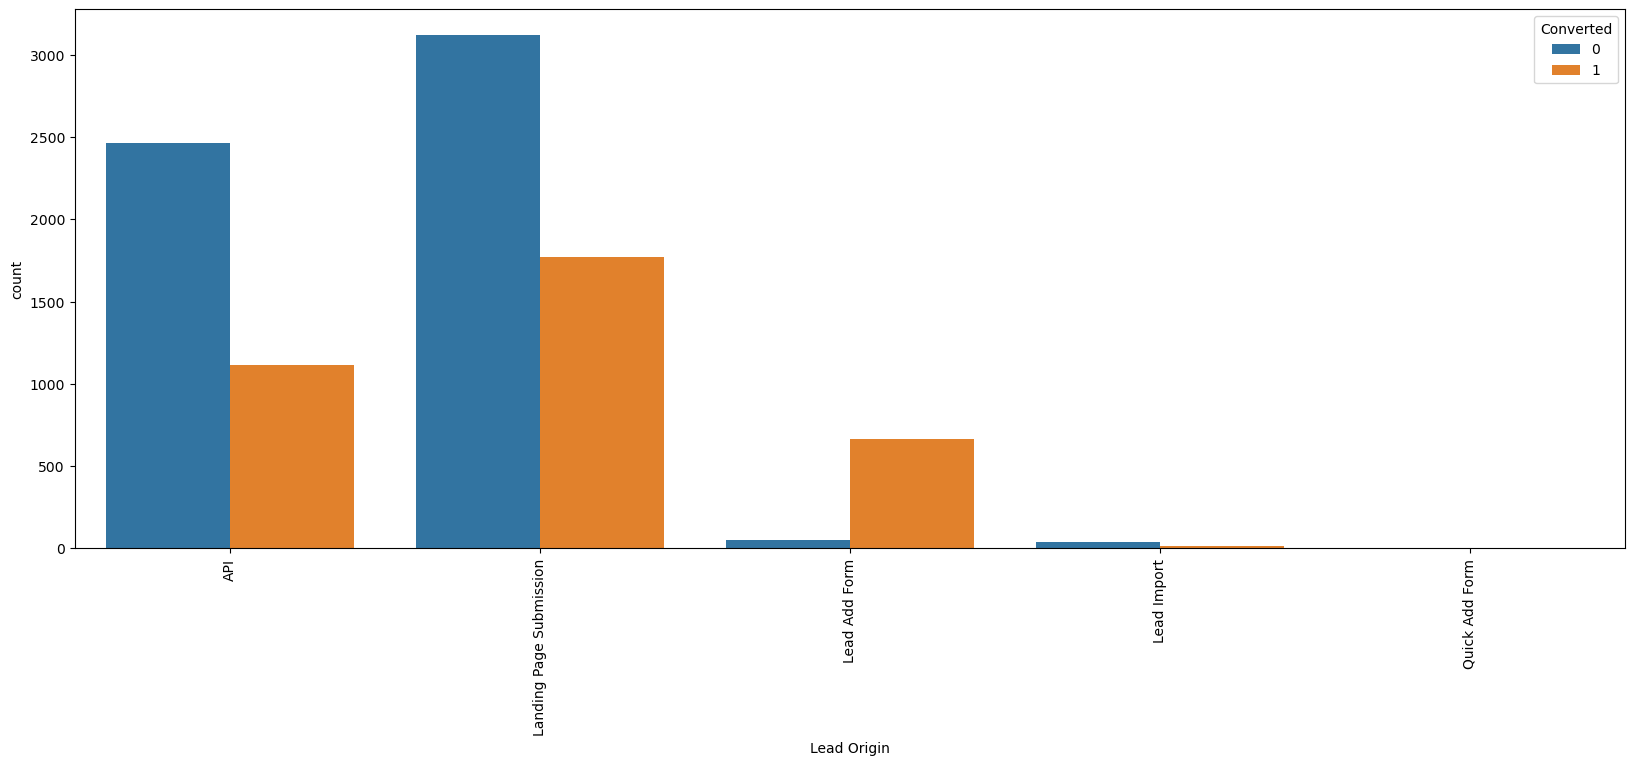

In [47]:
plt.figure(figsize=(20, 7))
sns.countplot(x = 'Lead Origin', hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

#### Observations for Lead Origin :
'API' and 'Landing Page Submission' generate the most leads but have less conversion rates of around 30%. Whereas, 'Lead Add Form' generates less leads but conversion rate is great. We should try to increase conversion rate for 'API' and 'Landing Page Submission', and increase leads generation using 'Lead Add Form'. 'Lead Import' does not seem very significant.

In [48]:
lead2["Lead Source"].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Most of the people came via Google followed by Direct Traffic source.

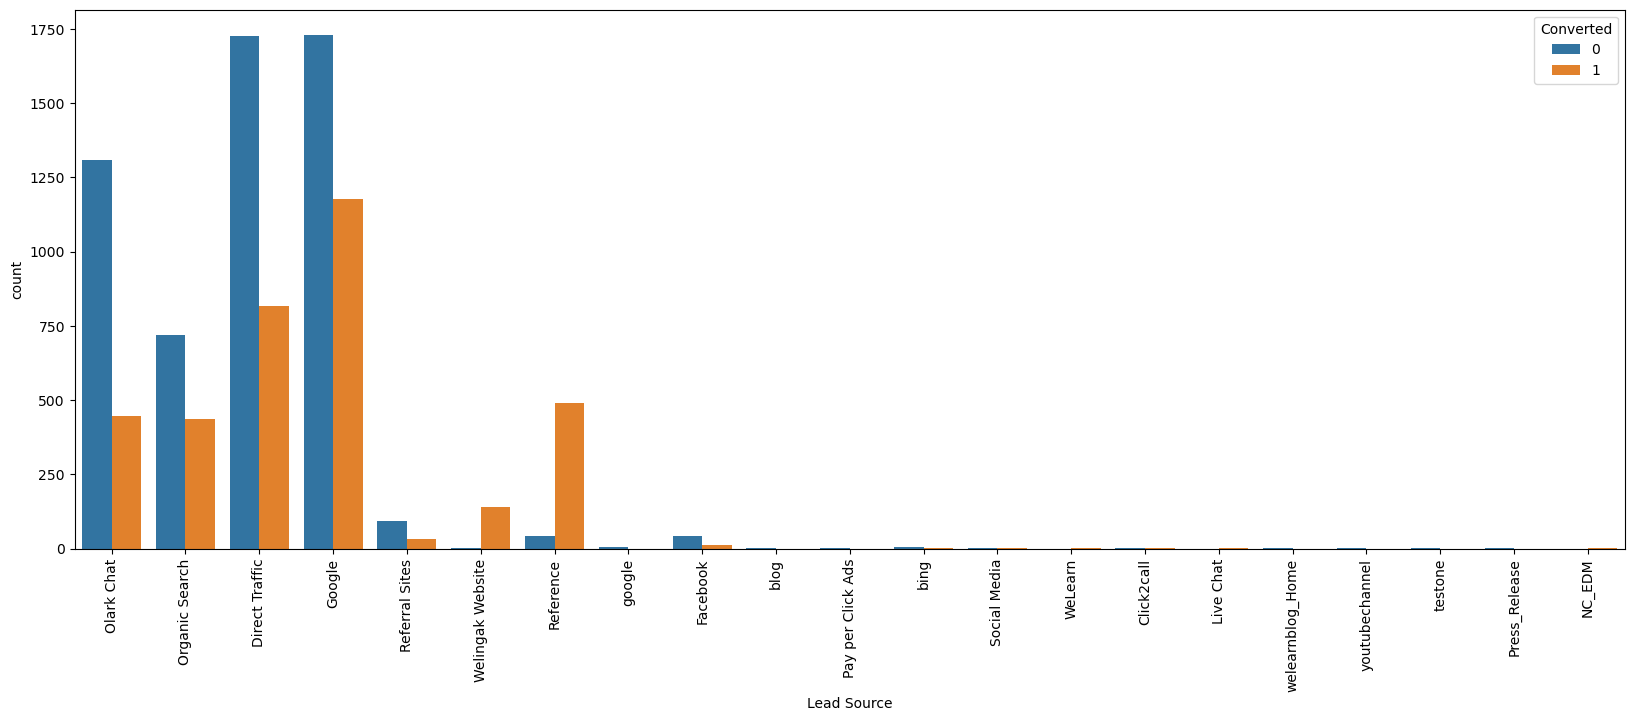

In [49]:
plt.figure(figsize=(20, 7))
sns.countplot(x = 'Lead Source', hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

#### Observations for Lead Source : 
- Spelling error: We've to change 'google' to 'Google'
- As it can be seen from the graph, number of leads generated by many of the sources are negligible. There are sufficient numbers till Facebook. We can convert all others in one single category of 'Others'.
- 'Direct Traffic' and 'Google' generate maximum number of leads while maximum conversion rate is achieved through 'Reference' and 'Welingak Website'.

In [50]:
# To correct spelling error
lead2['Lead Source'] = lead2['Lead Source'].replace(['google'], 'Google')

In [51]:
categories = lead2['Lead Source'].unique()
categories

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

We can see that we require first eight categories.

In [52]:
# To reduce categories
lead2['Lead Source'] = lead2['Lead Source'].replace(categories[8:], 'Others')

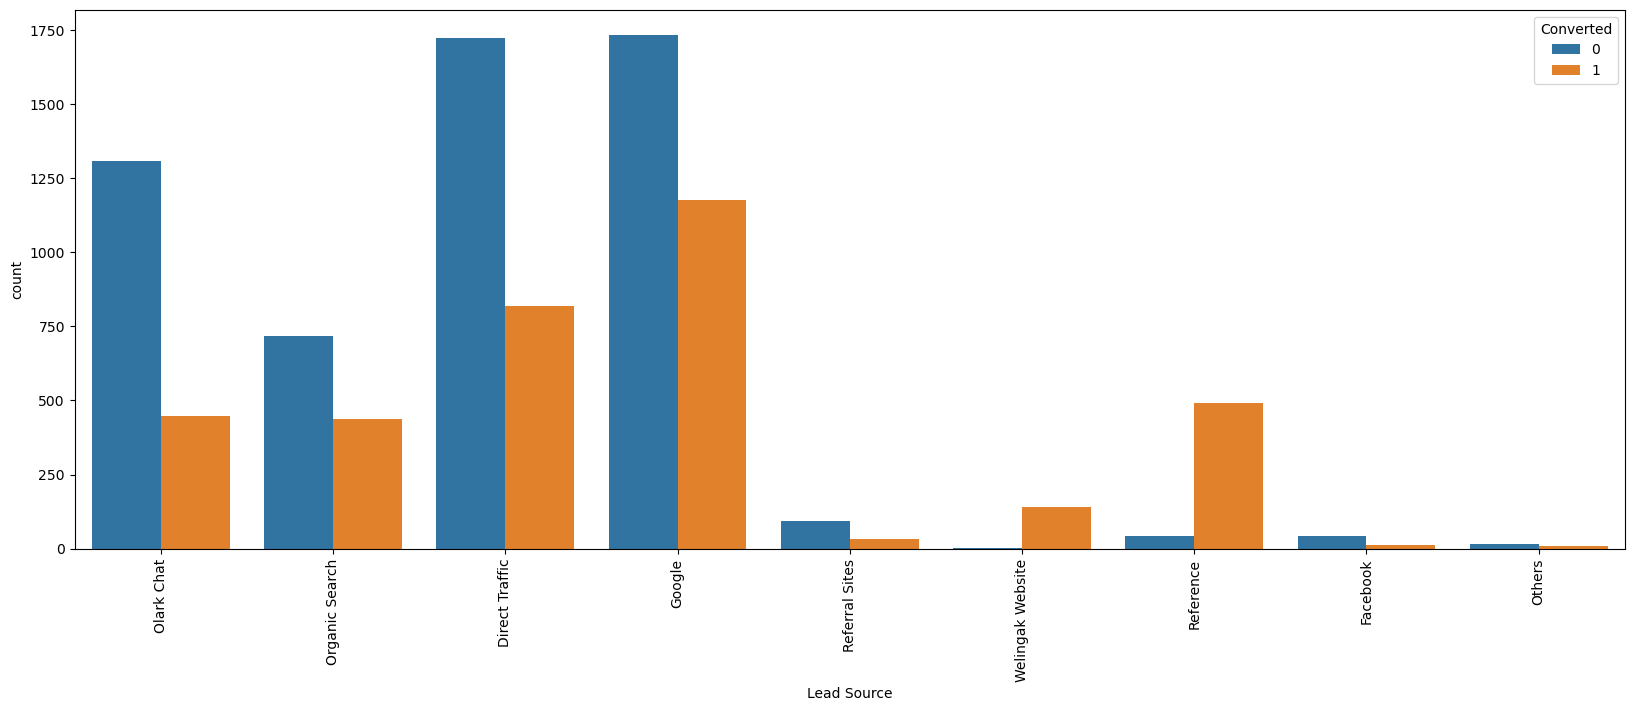

In [53]:
plt.figure(figsize=(20, 7))
sns.countplot(x = 'Lead Source', hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

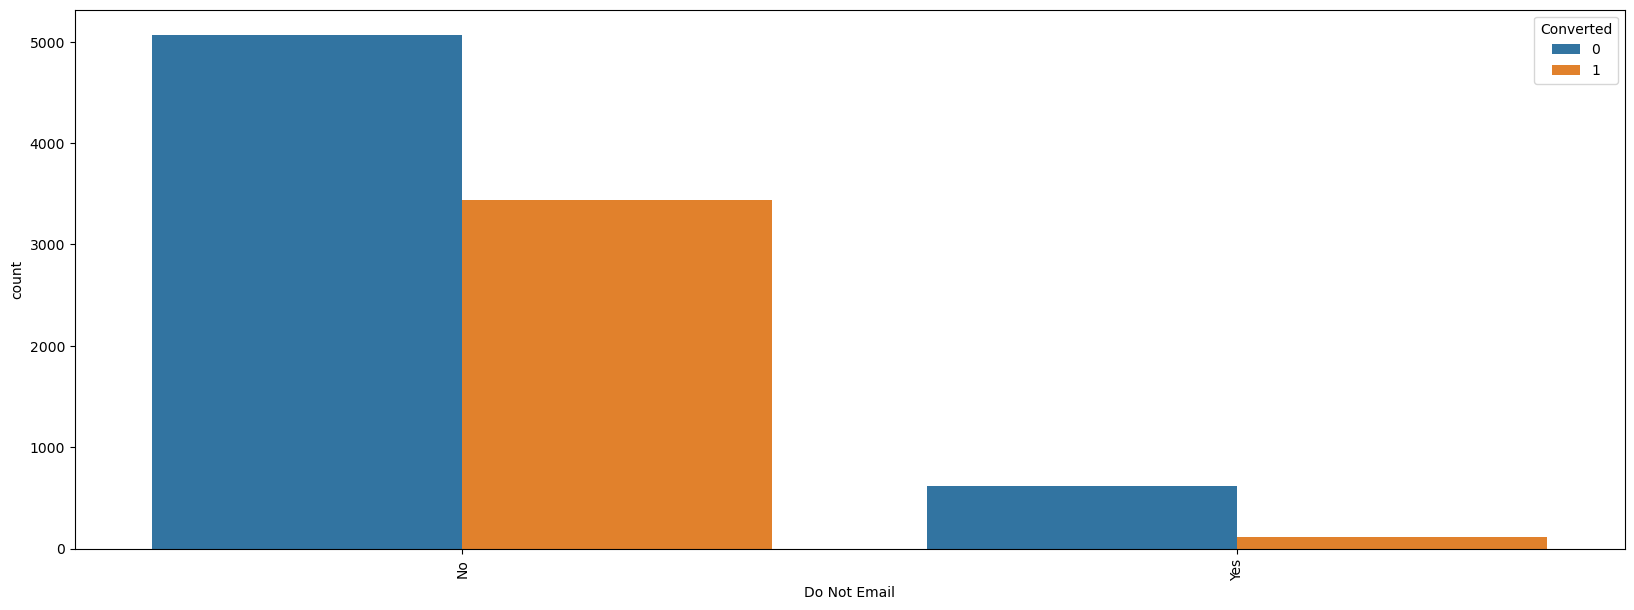

In [54]:
plt.figure(figsize=(20, 7))
sns.countplot(x = 'Do Not Email', hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

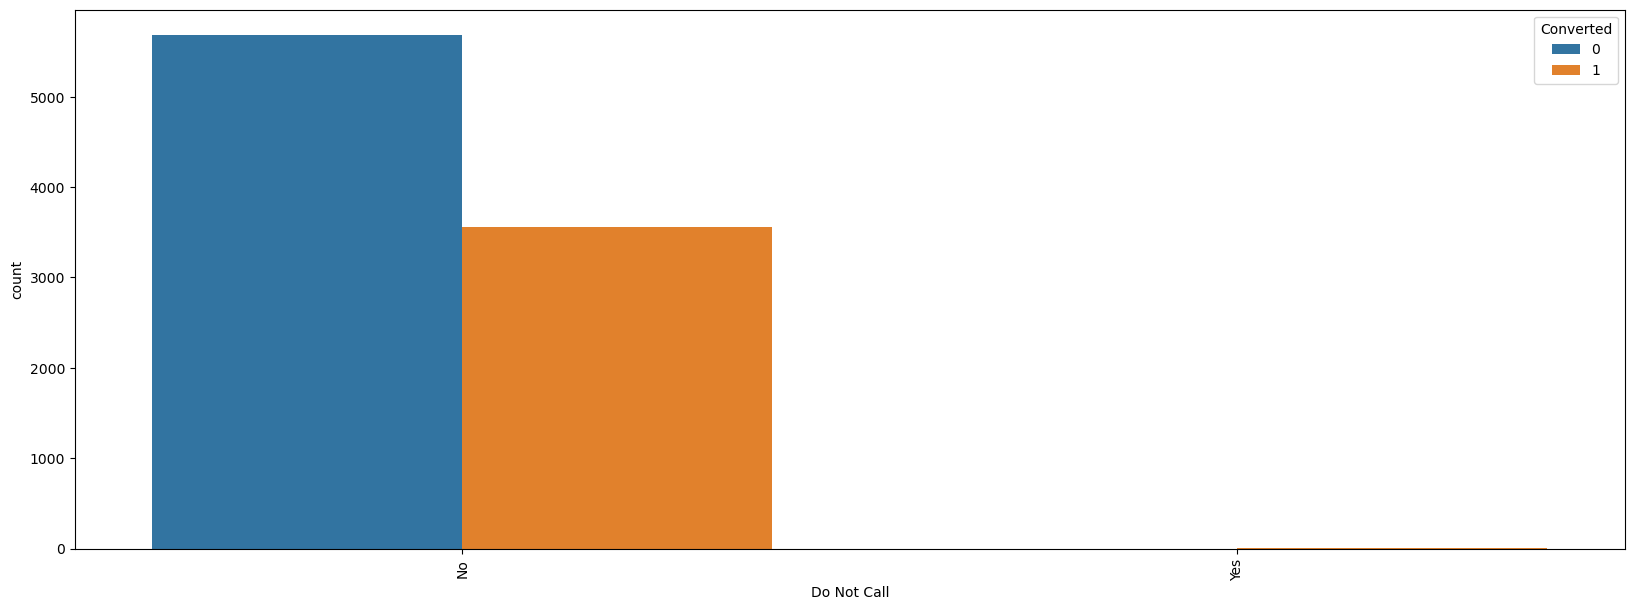

In [55]:
plt.figure(figsize=(20, 7))
sns.countplot(x = 'Do Not Call', hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

Observations for Do Not Email and Do Not Call :
- As one can expect, most of the responses are 'No' for both the variables which generated most of the leads.

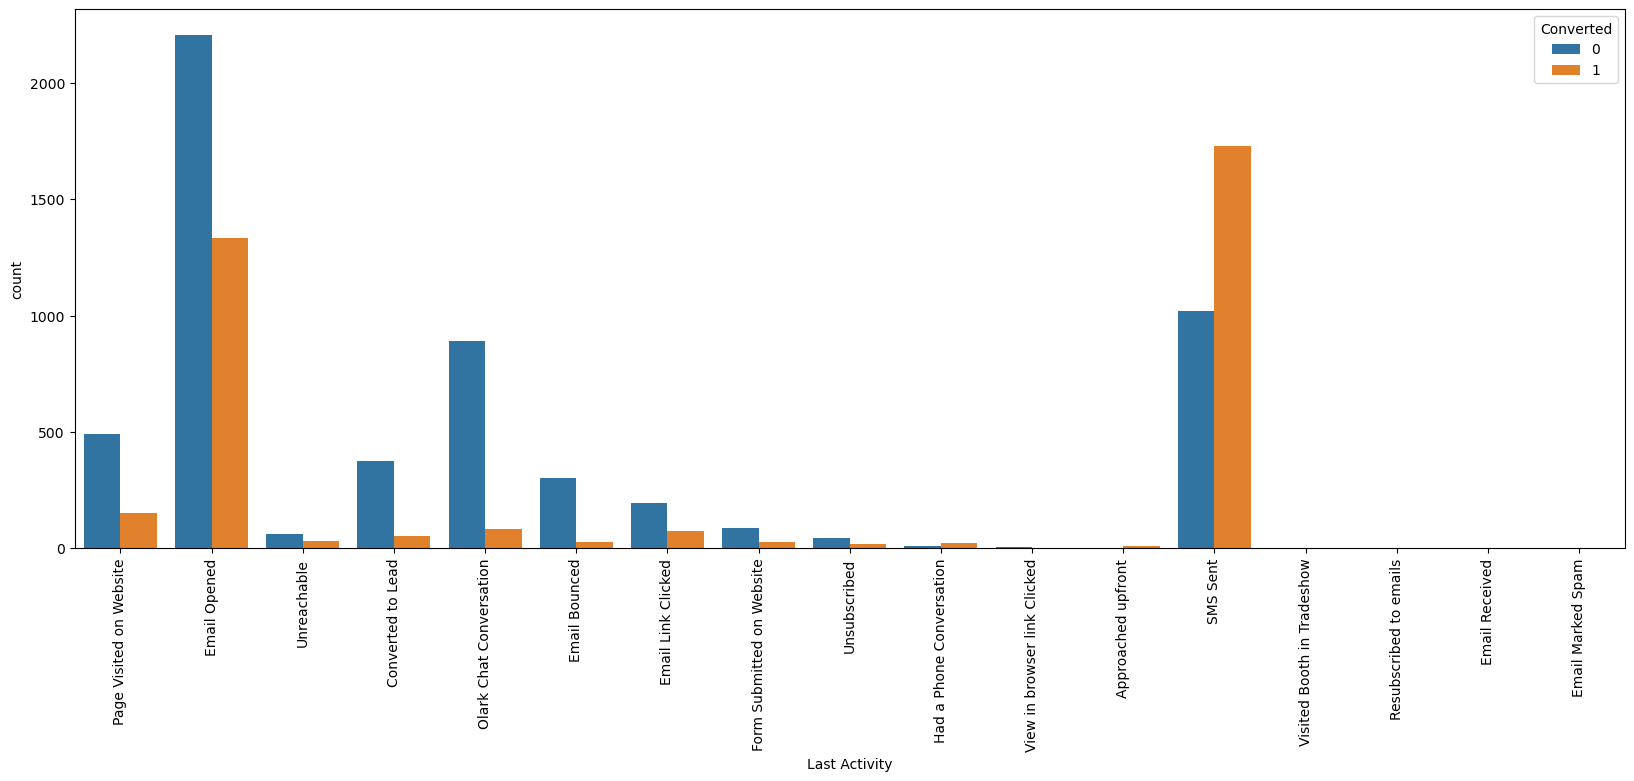

In [56]:
plt.figure(figsize=(20, 7))
sns.countplot(x = 'Last Activity', hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

Observations for Last Activity :

- Highest number of lead are generated where the last activity is 'Email Opened' while maximum conversion rate is for the activity of 'SMS Sent'. Its conversion rate is significantly high.
- Categories after the 'SMS Sent' have almost negligible effect. We can aggregate them all in one single category.

In [57]:
categories = lead2['Last Activity'].unique()
categories

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [58]:
# To reduce categories
lead2['Last Activity'] = lead2['Last Activity'].replace(categories[-5:], 'Others')

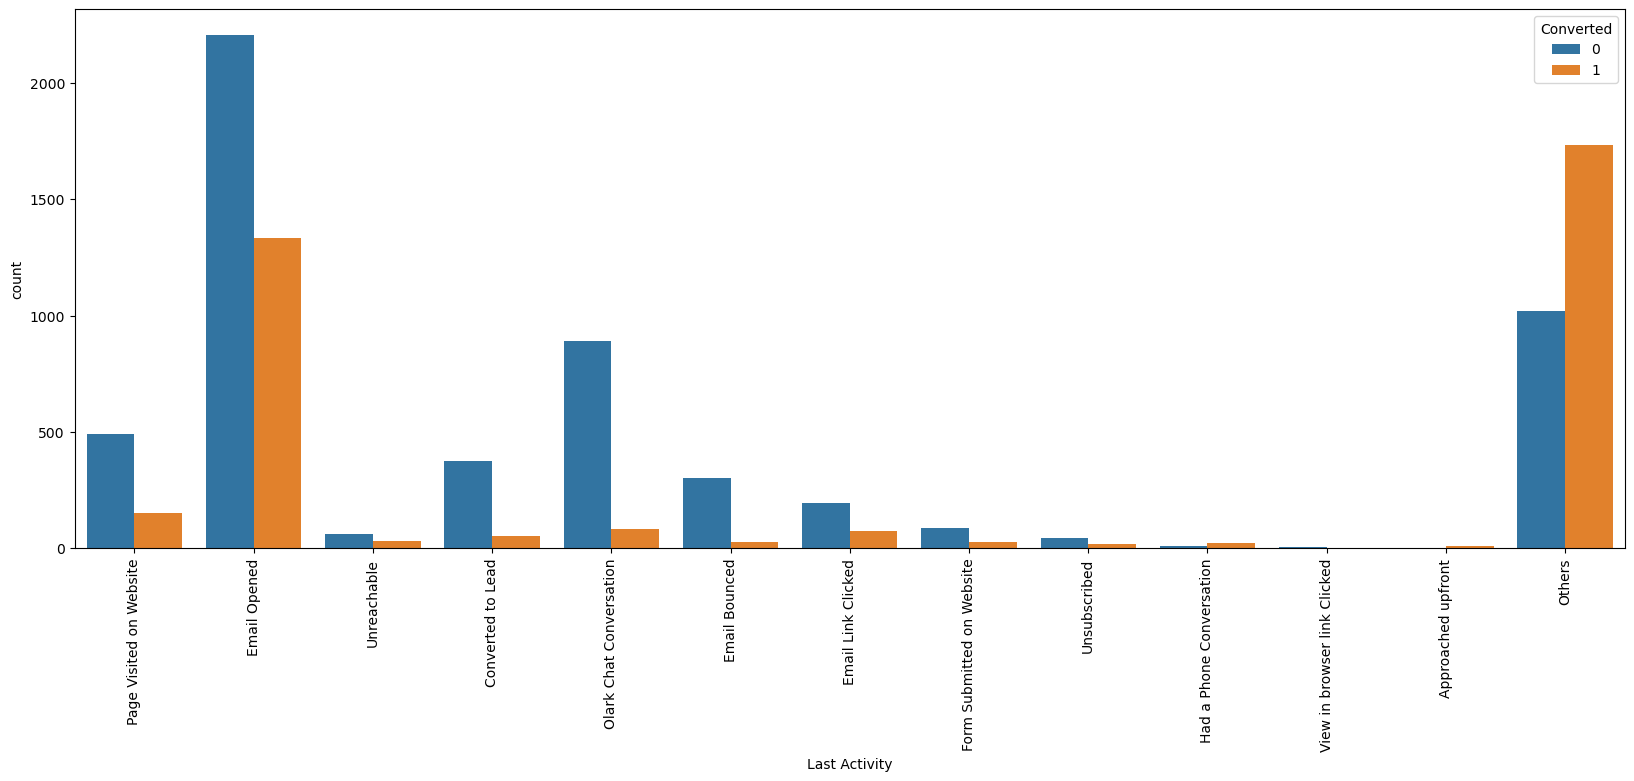

In [59]:
plt.figure(figsize=(20, 7))
sns.countplot(x = 'Last Activity', hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

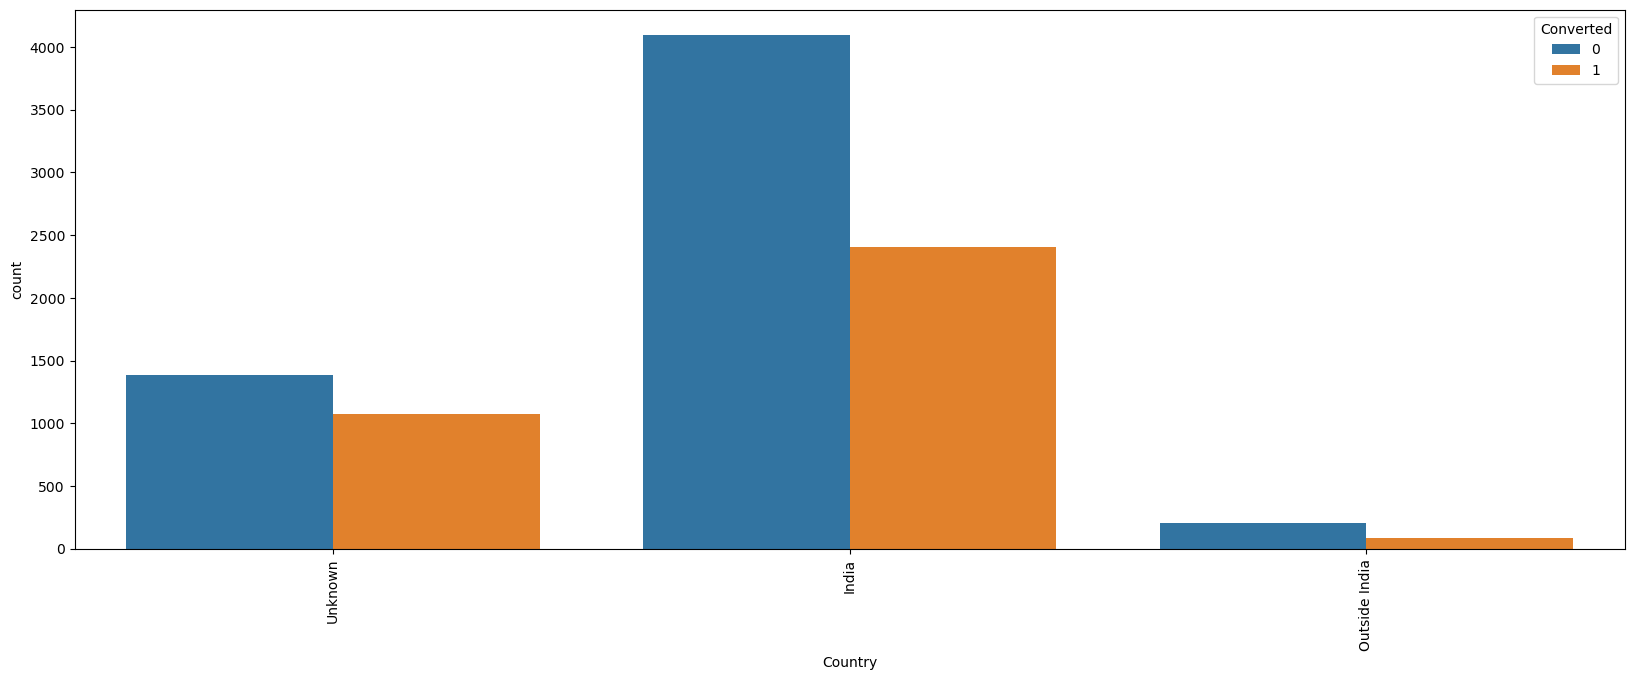

In [60]:
plt.figure(figsize=(20, 7))
sns.countplot(x = 'Country', hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

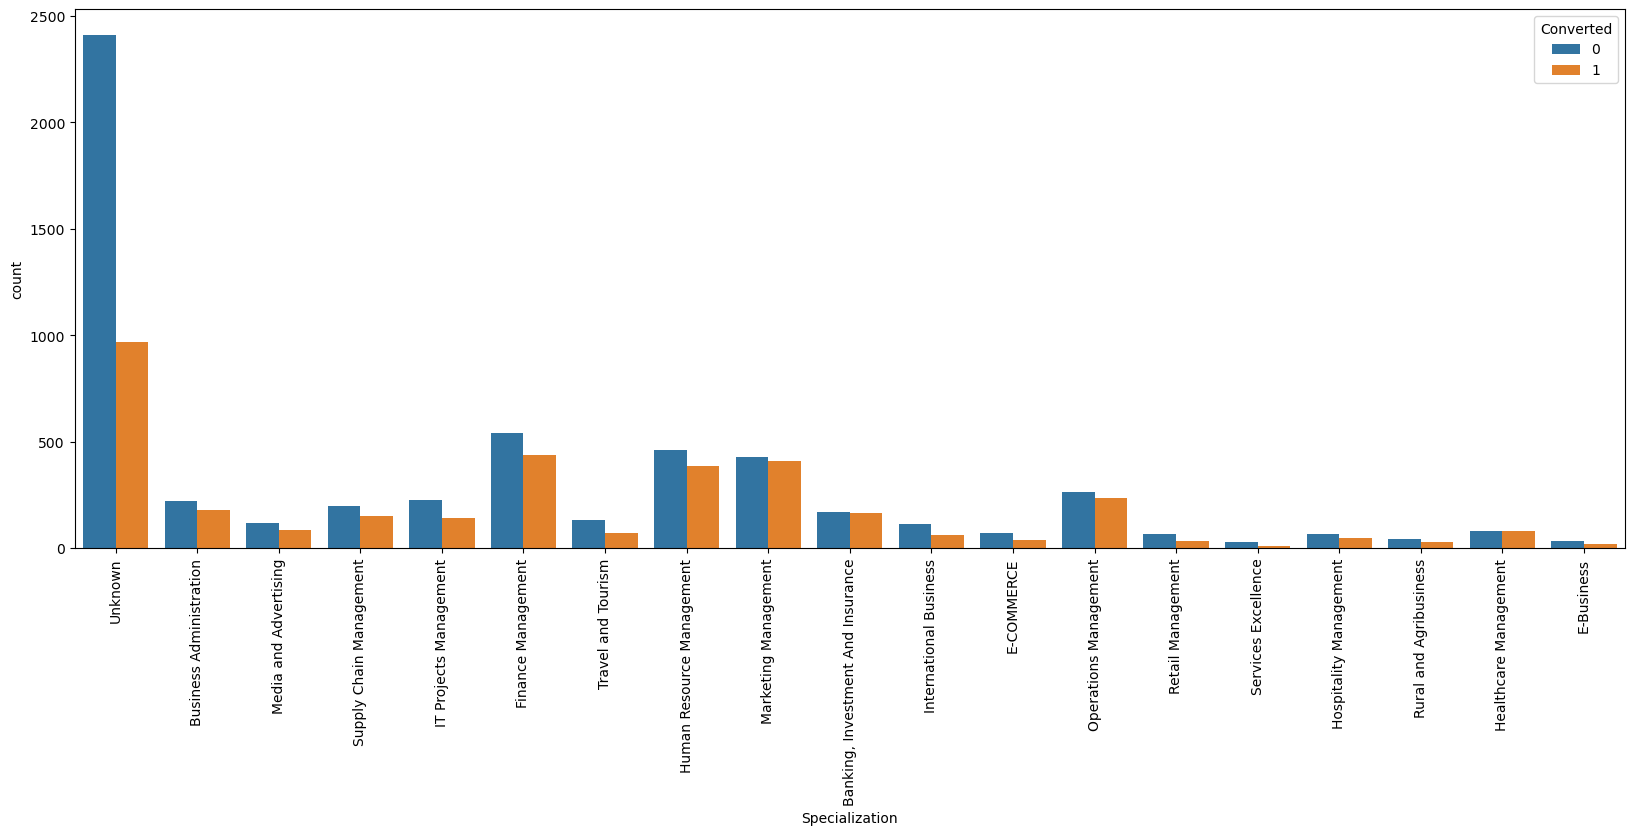

In [61]:
plt.figure(figsize=(20, 7))
sns.countplot(x = 'Specialization', hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

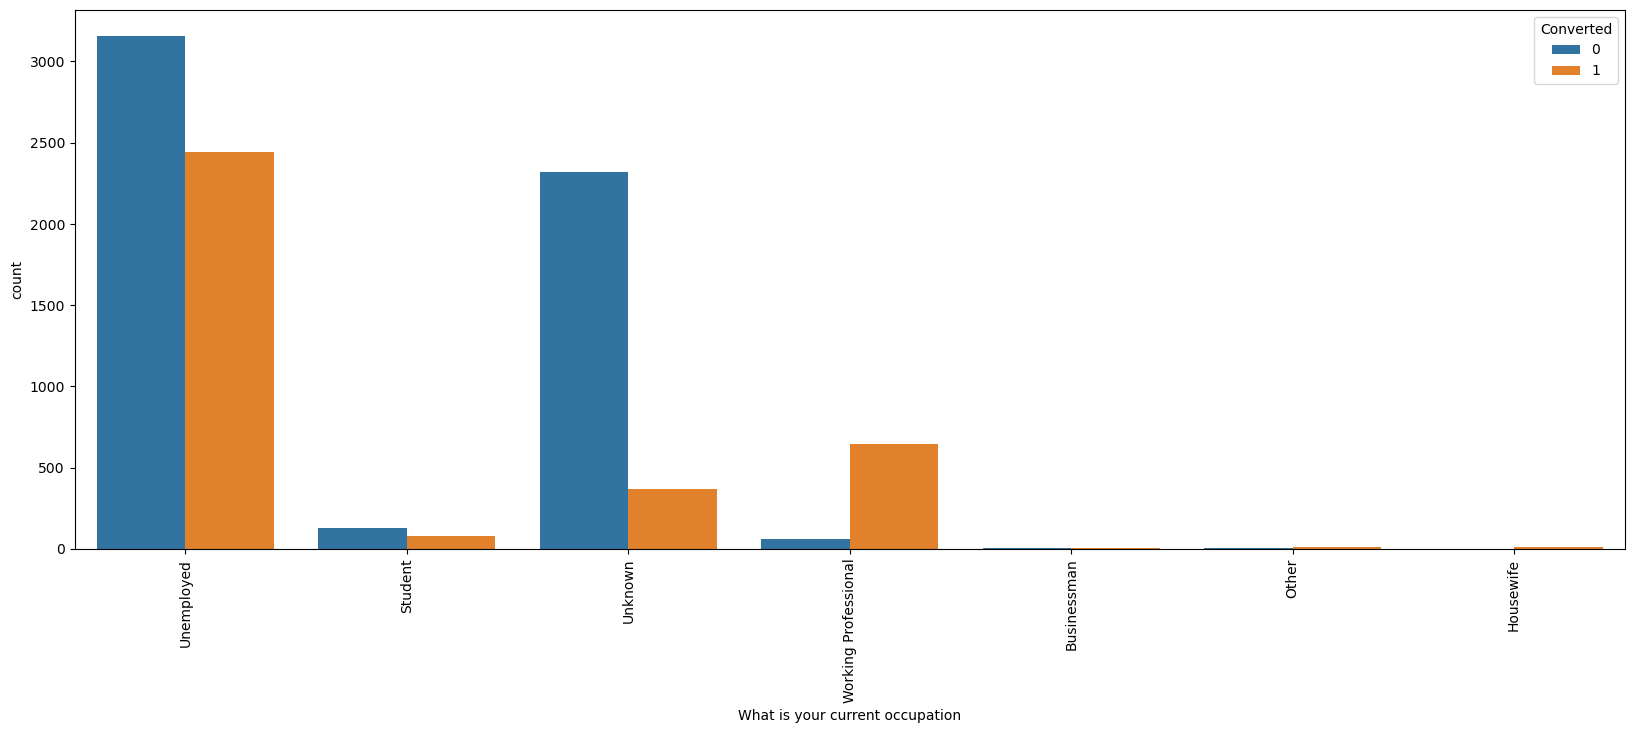

In [62]:
plt.figure(figsize=(20, 7))
sns.countplot(x = 'What is your current occupation', hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

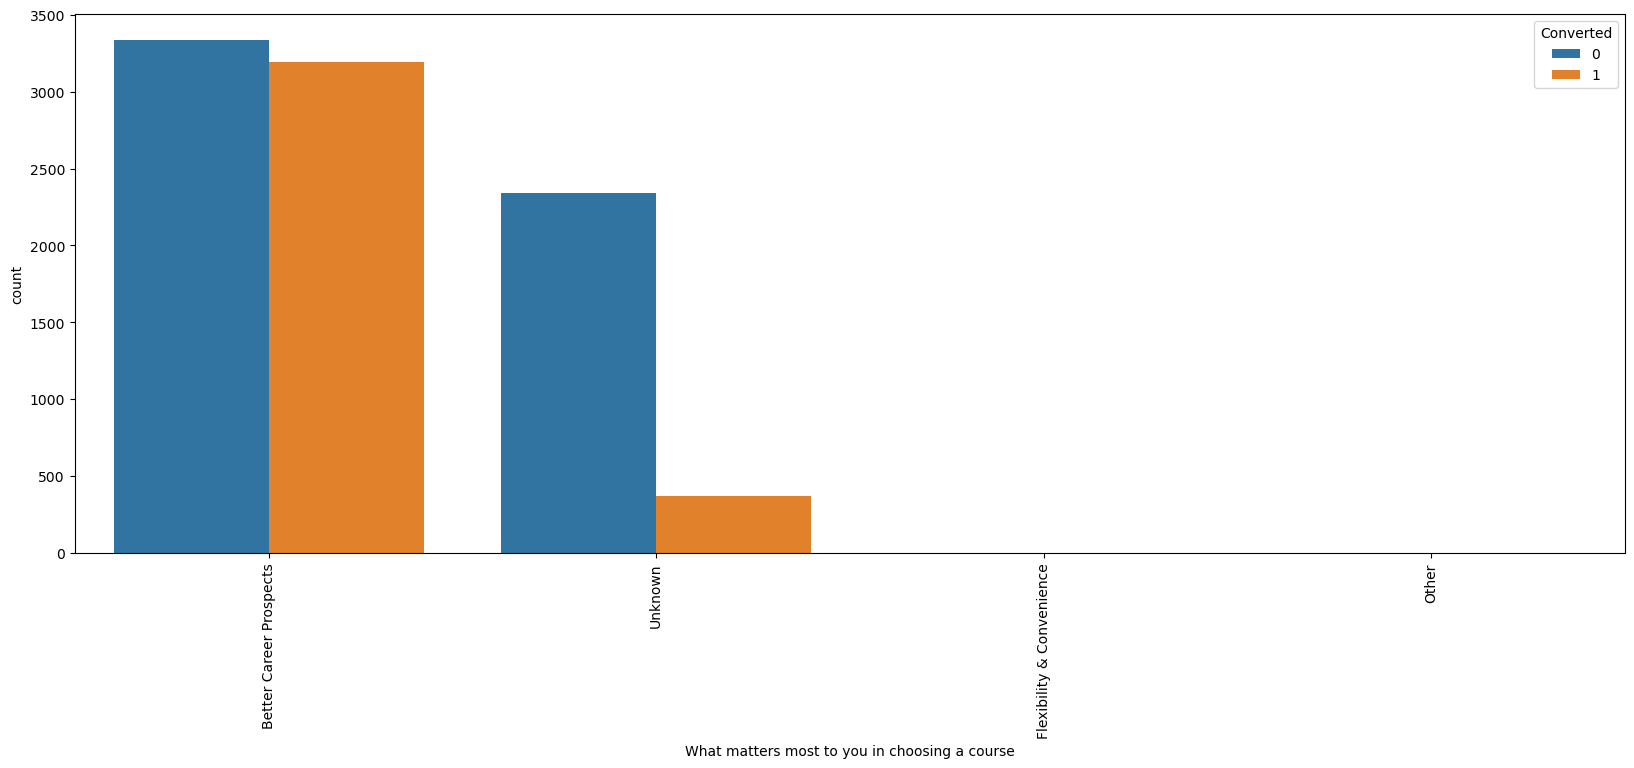

In [63]:
plt.figure(figsize=(20, 7))
sns.countplot(x = 'What matters most to you in choosing a course', hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

In [64]:
# Functions to plot countplots for categorical variables with target variable

# For single plot
def plot_cat_var(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x = var, hue = "Converted",palette = 'icefire', data = lead2)
    plt.xticks(rotation = 90)
    plt.show()

# For multiple plots    
def plot_cat_vars(lst):
    l = int(len(lst)/2)
    plt.figure(figsize=(20, l*7))
    for var in lst:
        plt.subplot(l,2,lst.index(var)+1)
        sns.countplot(x = var, hue = "Converted",palette = 'icefire', data = lead2)
        plt.xticks(rotation = 90)
    plt.show()

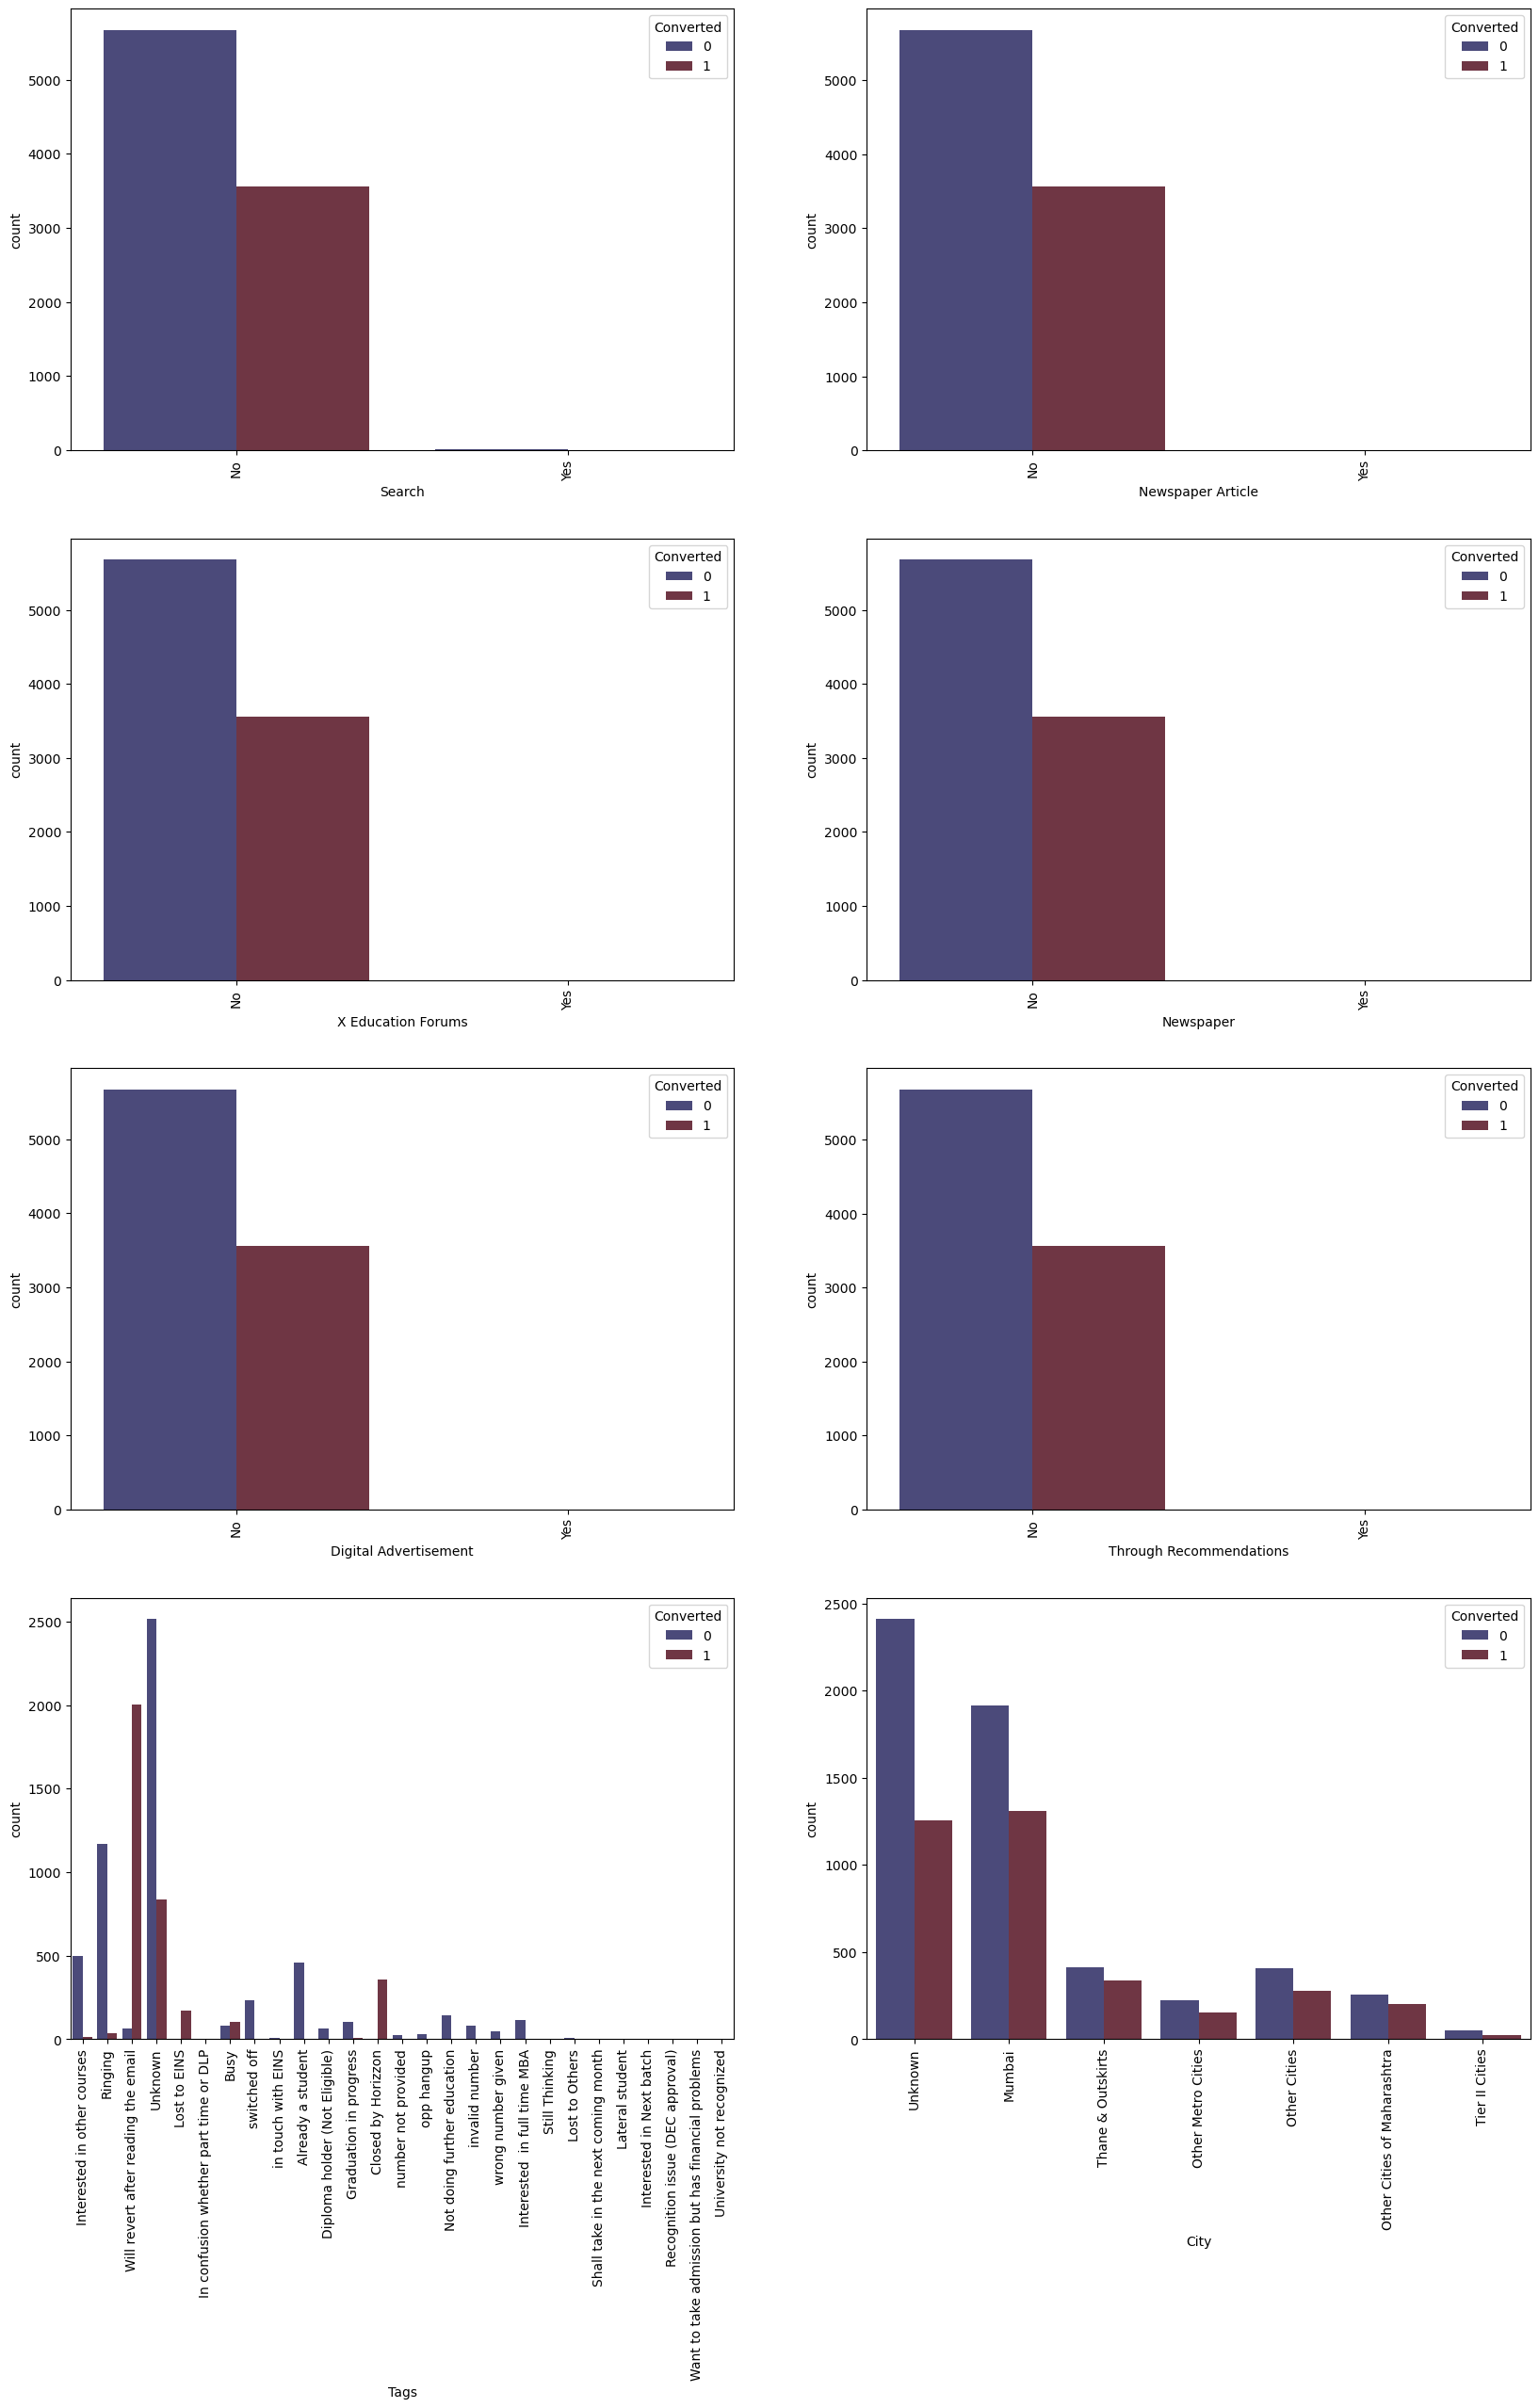

In [65]:
plot_cat_vars(cat_var[9:17])

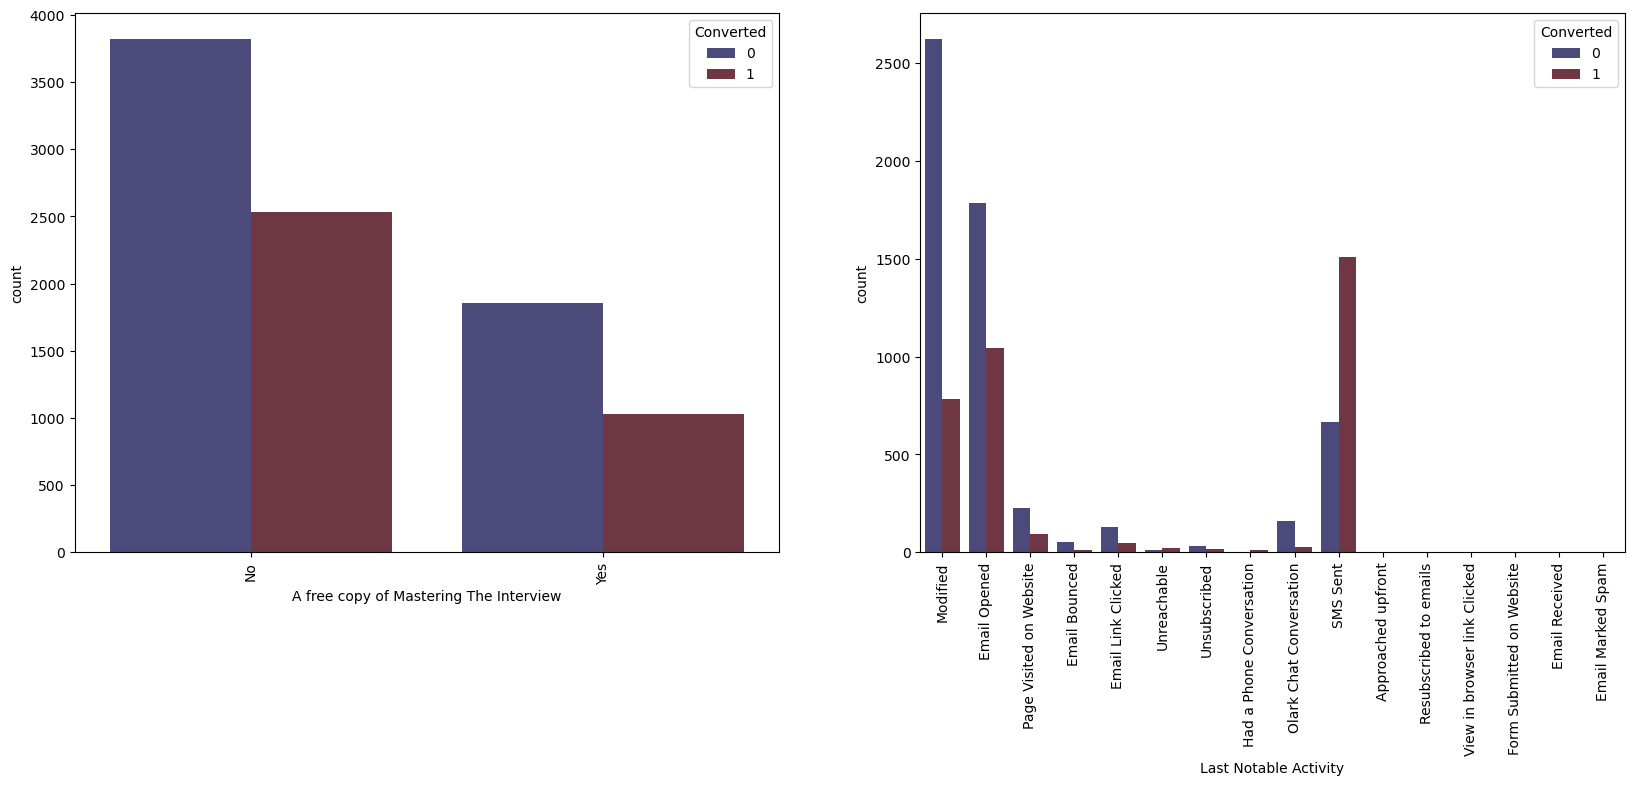

In [66]:
plot_cat_vars([cat_var[17],cat_var[18]])

Observations for Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, and Receive More Updates About Our Courses:
As all the above variables have most of the values as no, nothing significant can be inferred from these plots.

 Observations for Tags:  In Tags, categories after 'Interested in full time MBA' have very few leads generated, so we can combine them into one single category.


## Numerical Variables

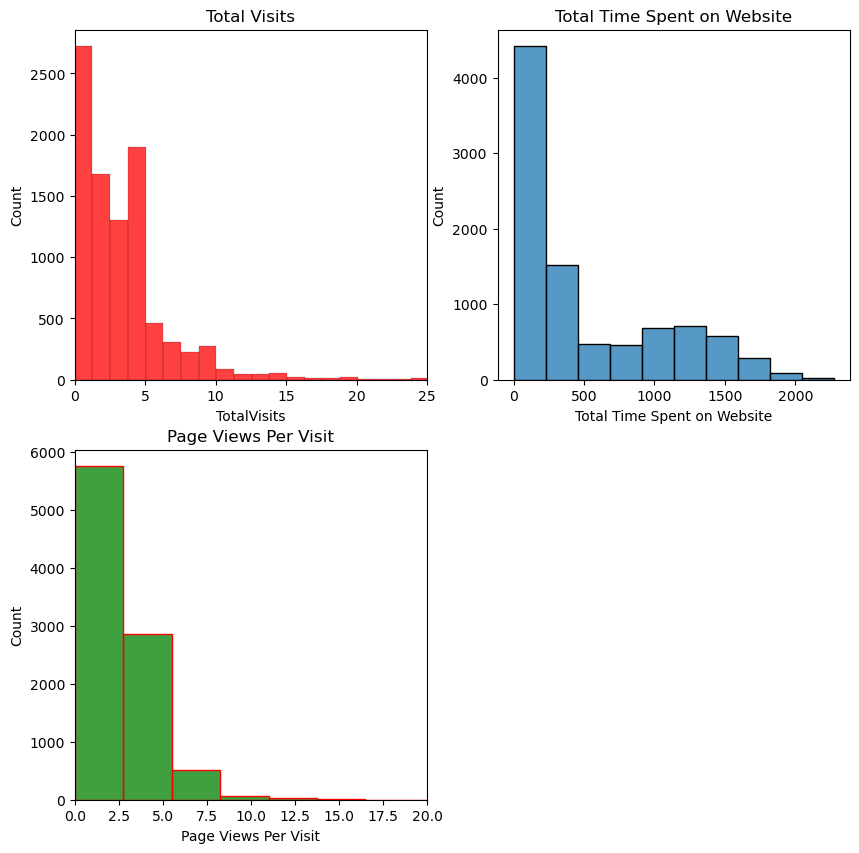

In [67]:
plt.figure(figsize = (10,10))

plt.subplot(221)
sns.histplot(lead2['TotalVisits'],color = 'red',  bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
sns.histplot(lead2['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
sns.histplot(lead2['Page Views Per Visit'],color = 'green',ec = 'red', bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show()


### Relating all the categorical variables to Converted

In [68]:
lead2.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

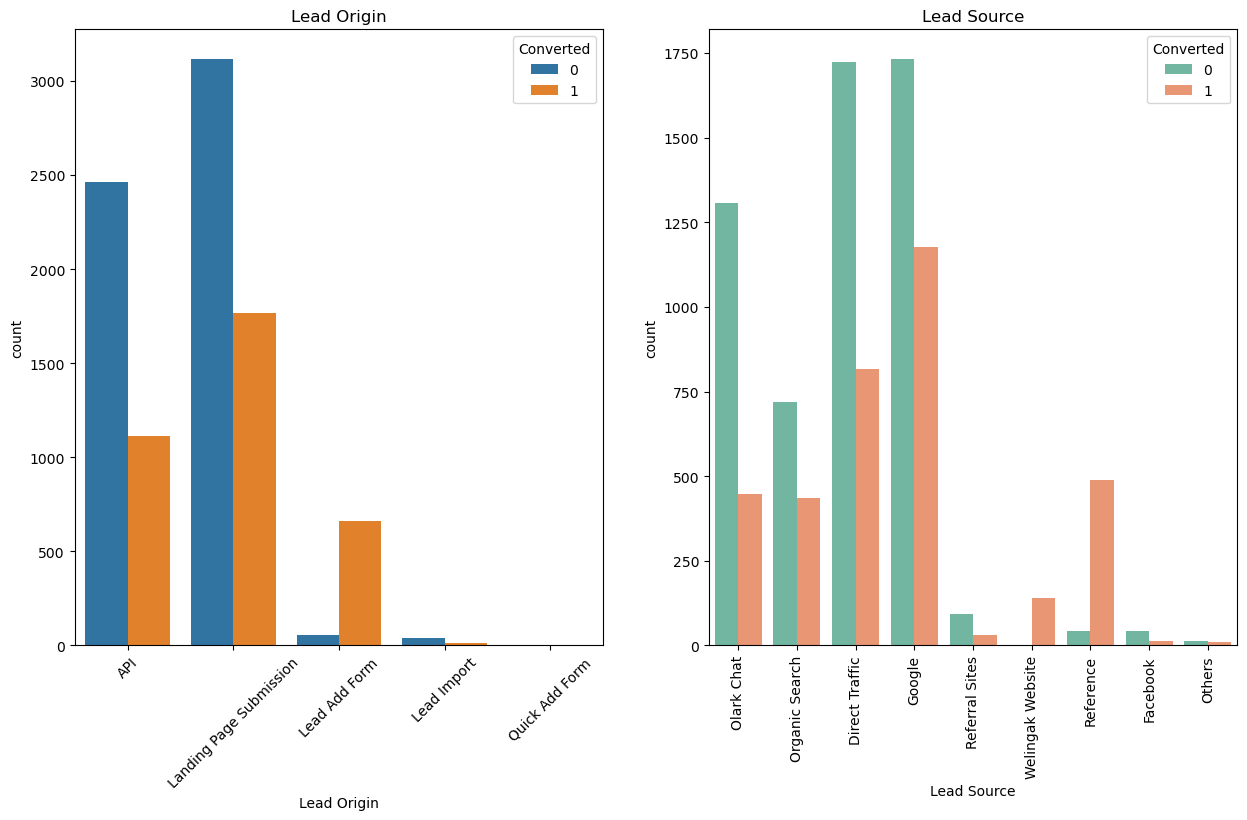

In [69]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead2).tick_params(axis='x', rotation = 45)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source',palette = 'Set2', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

- inference 1 = Added form is more effective way to convert people but it is significantly less in count.
- inference 2 = Landing Page Submission has highest count of people who did'nt convert. Still it is second best effective way to convert people.
- inference 3 = Reference helps most in converting people followed by Google.
- inference 4 = Olark chat and refferal sites perform lowest in conversion of people.

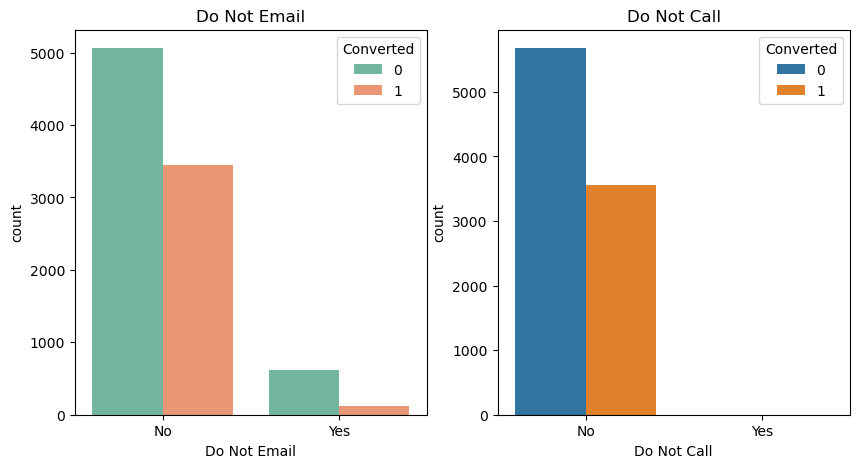

In [70]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email',palette = 'Set2', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('Do Not Call')
plt.show()

inference  = People who optioned out for no email and no call are having high chances of getting converted to join any course.


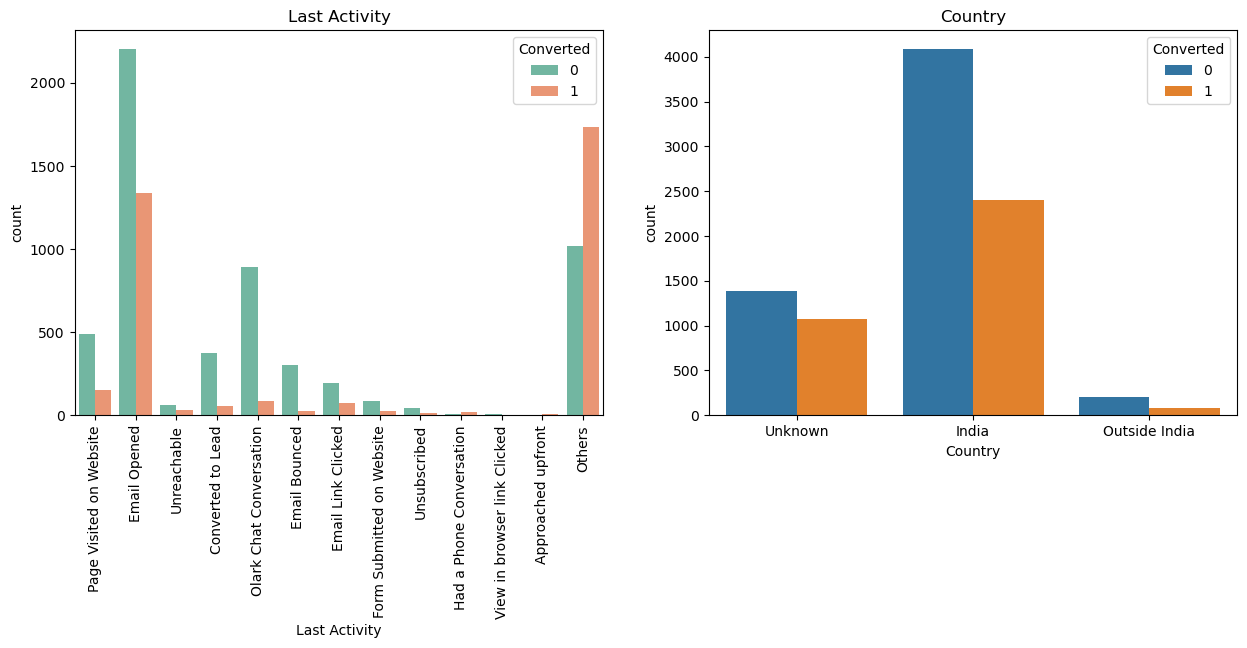

In [71]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity',palette = 'Set2', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('Country')
plt.show()

- inference 1 = Sms sending have very good response from people which relfects in the conversion count.
- inference 2 = Email opened activity has less but good reponse from people in conversion count.
- inference 3 = Indian people are showing positive response in conversion count compared to out of India countries.

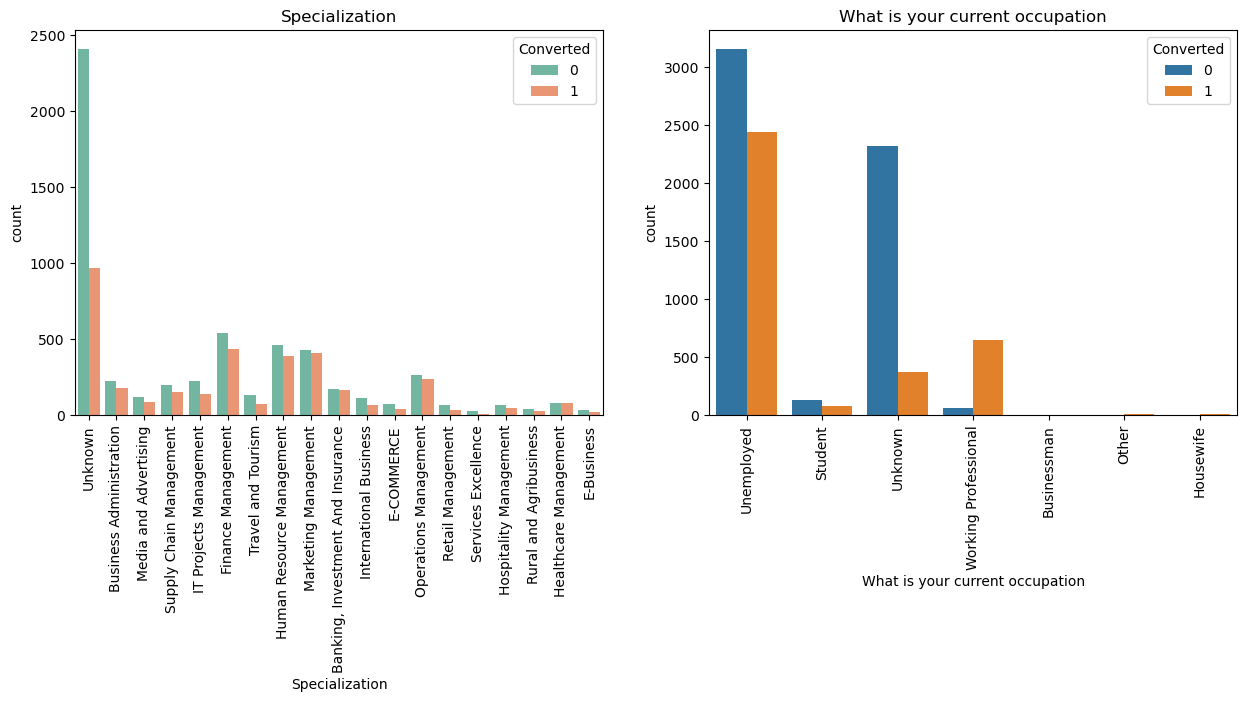

In [72]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization',palette = 'Set2', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

- inference 1 = Management professions like Finance, HR, Marketing and Operations have very good count of conversion compared to other specializations.
- inference 2 = Working profession shows excellent count of conversion whereas unemployed people have higher count for being converted.

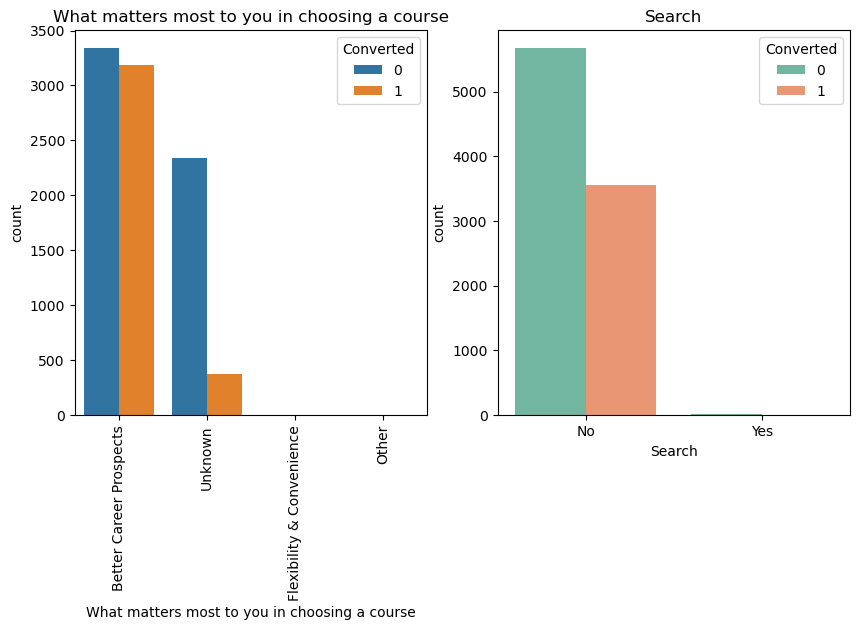

In [73]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', palette = 'Set2',data= lead2).tick_params(axis='x', rotation = 0)
plt.title('Search')
plt.show()

- inference 1 = People asking for Better Career Prospects shows highly positive response in conversion.
- inference 2 = People who didn't search about X Education courses are having good chances for conversion.

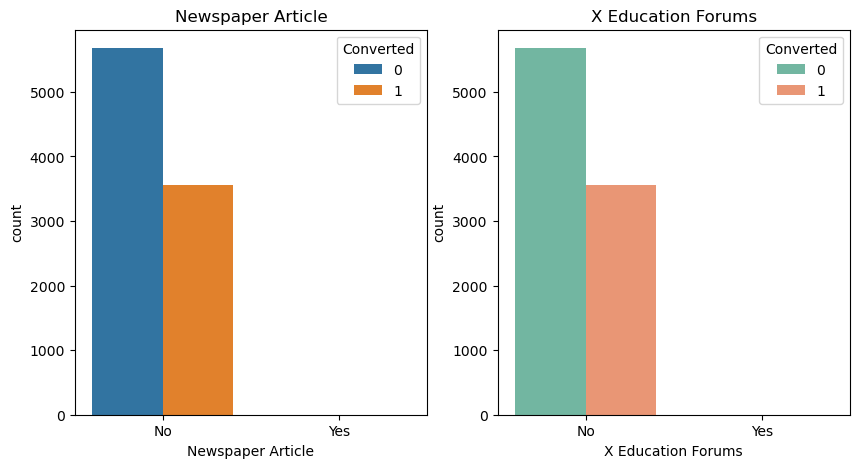

In [74]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums',palette = 'Set2', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('X Education Forums')
plt.show()

inference  = People who haven't seen ads on Newspaper Articles and X Education Forum has good conversion rate but still lower than non conversion rate.

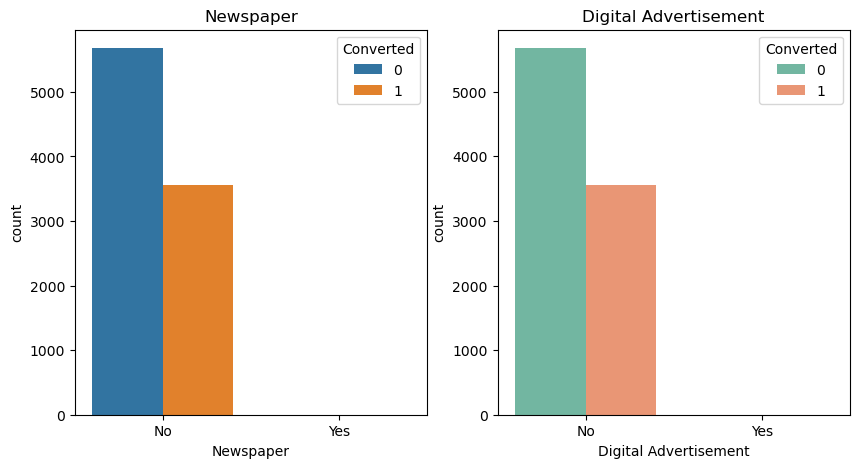

In [75]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement',palette = 'Set2', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('Digital Advertisement')
plt.show()

inference  = People who haven't seen ads in Newspaper and Digital Advertisement has good conversion rate but still lower than non conversion rate.

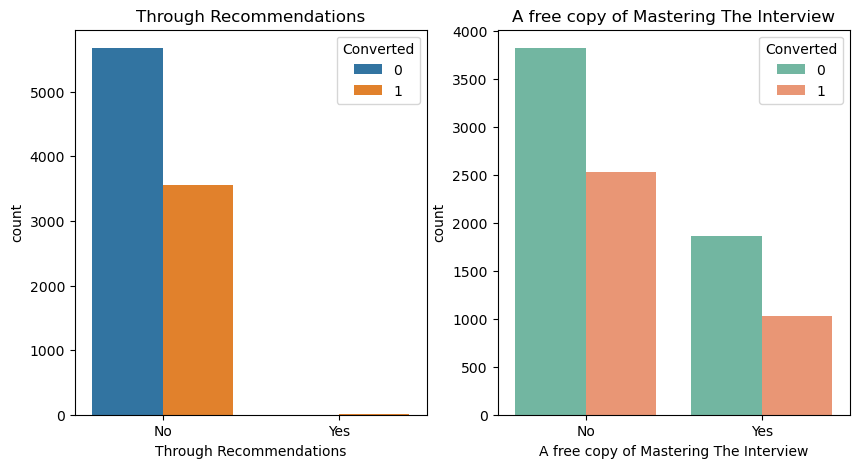

In [76]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview',palette = 'Set2', hue='Converted', data= lead2).tick_params(axis='x', rotation = 0)
plt.title('A free copy of Mastering The Interview')
plt.show()

inference  = People who haven't seen any ads through Recommendation as well as didn't demand for a free copy of Mastering the Interview have good count of conversion above 2400.

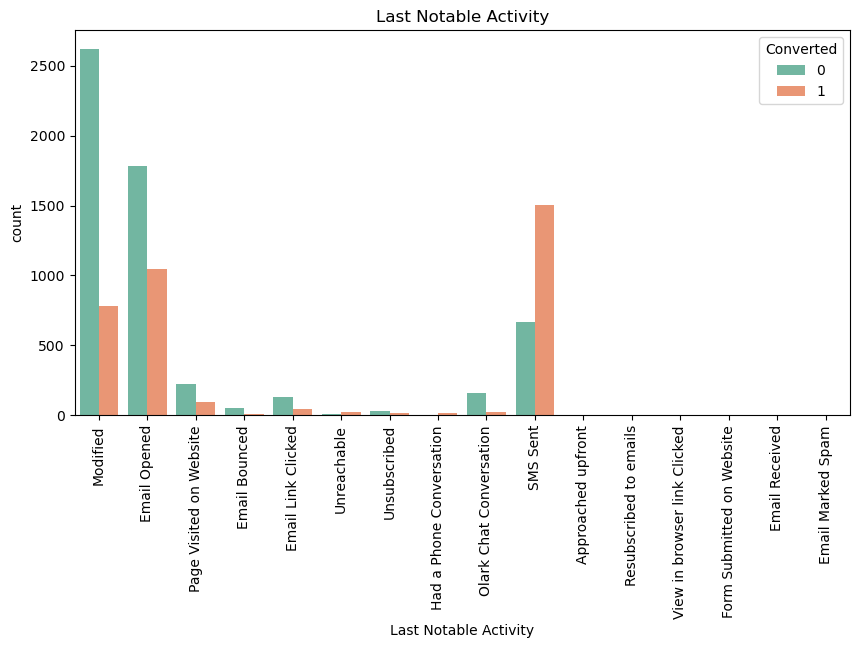

In [77]:
plt.figure(figsize = (10,5))
sns.countplot(x='Last Notable Activity',palette = 'Set2', hue='Converted', data = lead2).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

inference  = Sms Sent have highest conversion count compared to other activities followed by Email Opened.

## Multi Variate Analysis

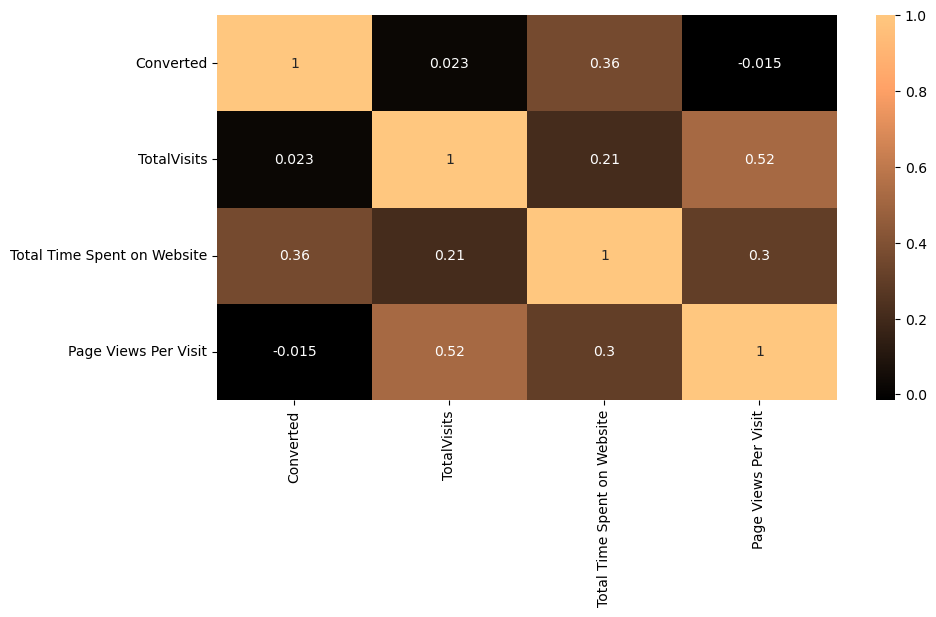

In [78]:
# To check the correlation among variables
plt.figure(figsize=(10,5))
sns.heatmap(lead2.corr(),cmap = "copper", annot = True)
plt.show()

- inference 1 = There is 0.36 correlation of "Total Time Spent on Website" with target variable "Converted".
- inference 2 = "Page Views Per Visit" have -0.015 correlation with target variable.

In [79]:
numeric = lead2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.327787
std,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


## Dummy Variables

In [80]:
lead2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [81]:
lead2.loc[:, lead2.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [82]:
# Create dummy variables use the 'get_dummies' funct
dummy = pd.get_dummies(lead2[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataset
dataset_final_dummy = pd.concat([lead2, dummy], axis=1)
dataset_final_dummy

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Unknown,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Unknown,No,Modified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Unknown,No,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Unknown,Unemployed,Better

In [83]:
pd.set_option('display.max_rows', None)
a = pd.DataFrame(dataset_final_dummy.columns)
a

,0
0,Lead Origin
1,Lead Source
2,Do Not Email
3,Do Not Call
4,Converted
5,TotalVisits
6,Total Time Spent on Website
7,Page Views Per Visit
8,Last Activity
9,Country


In [84]:
dataset_final_dummy = dataset_final_dummy.drop(['Tags','City','What is your current occupation_Unknown','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_Unknown','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [85]:
dataset_final_dummy.shape

(9240, 67)

## Test-Train Split

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X = dataset_final_dummy.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [88]:
# Put the target variable in y
y = dataset_final_dummy['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [89]:
# Split the dataset as 70% | 30% for train and test. 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3112,0.007968,0.182867,0.083333,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8413,0.019920,0.679538,0.208333,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2961,0.011952,0.553928,0.041667,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
24,0.023904,0.504660,0.062500,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2740,0.011952,0.445184,0.125000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


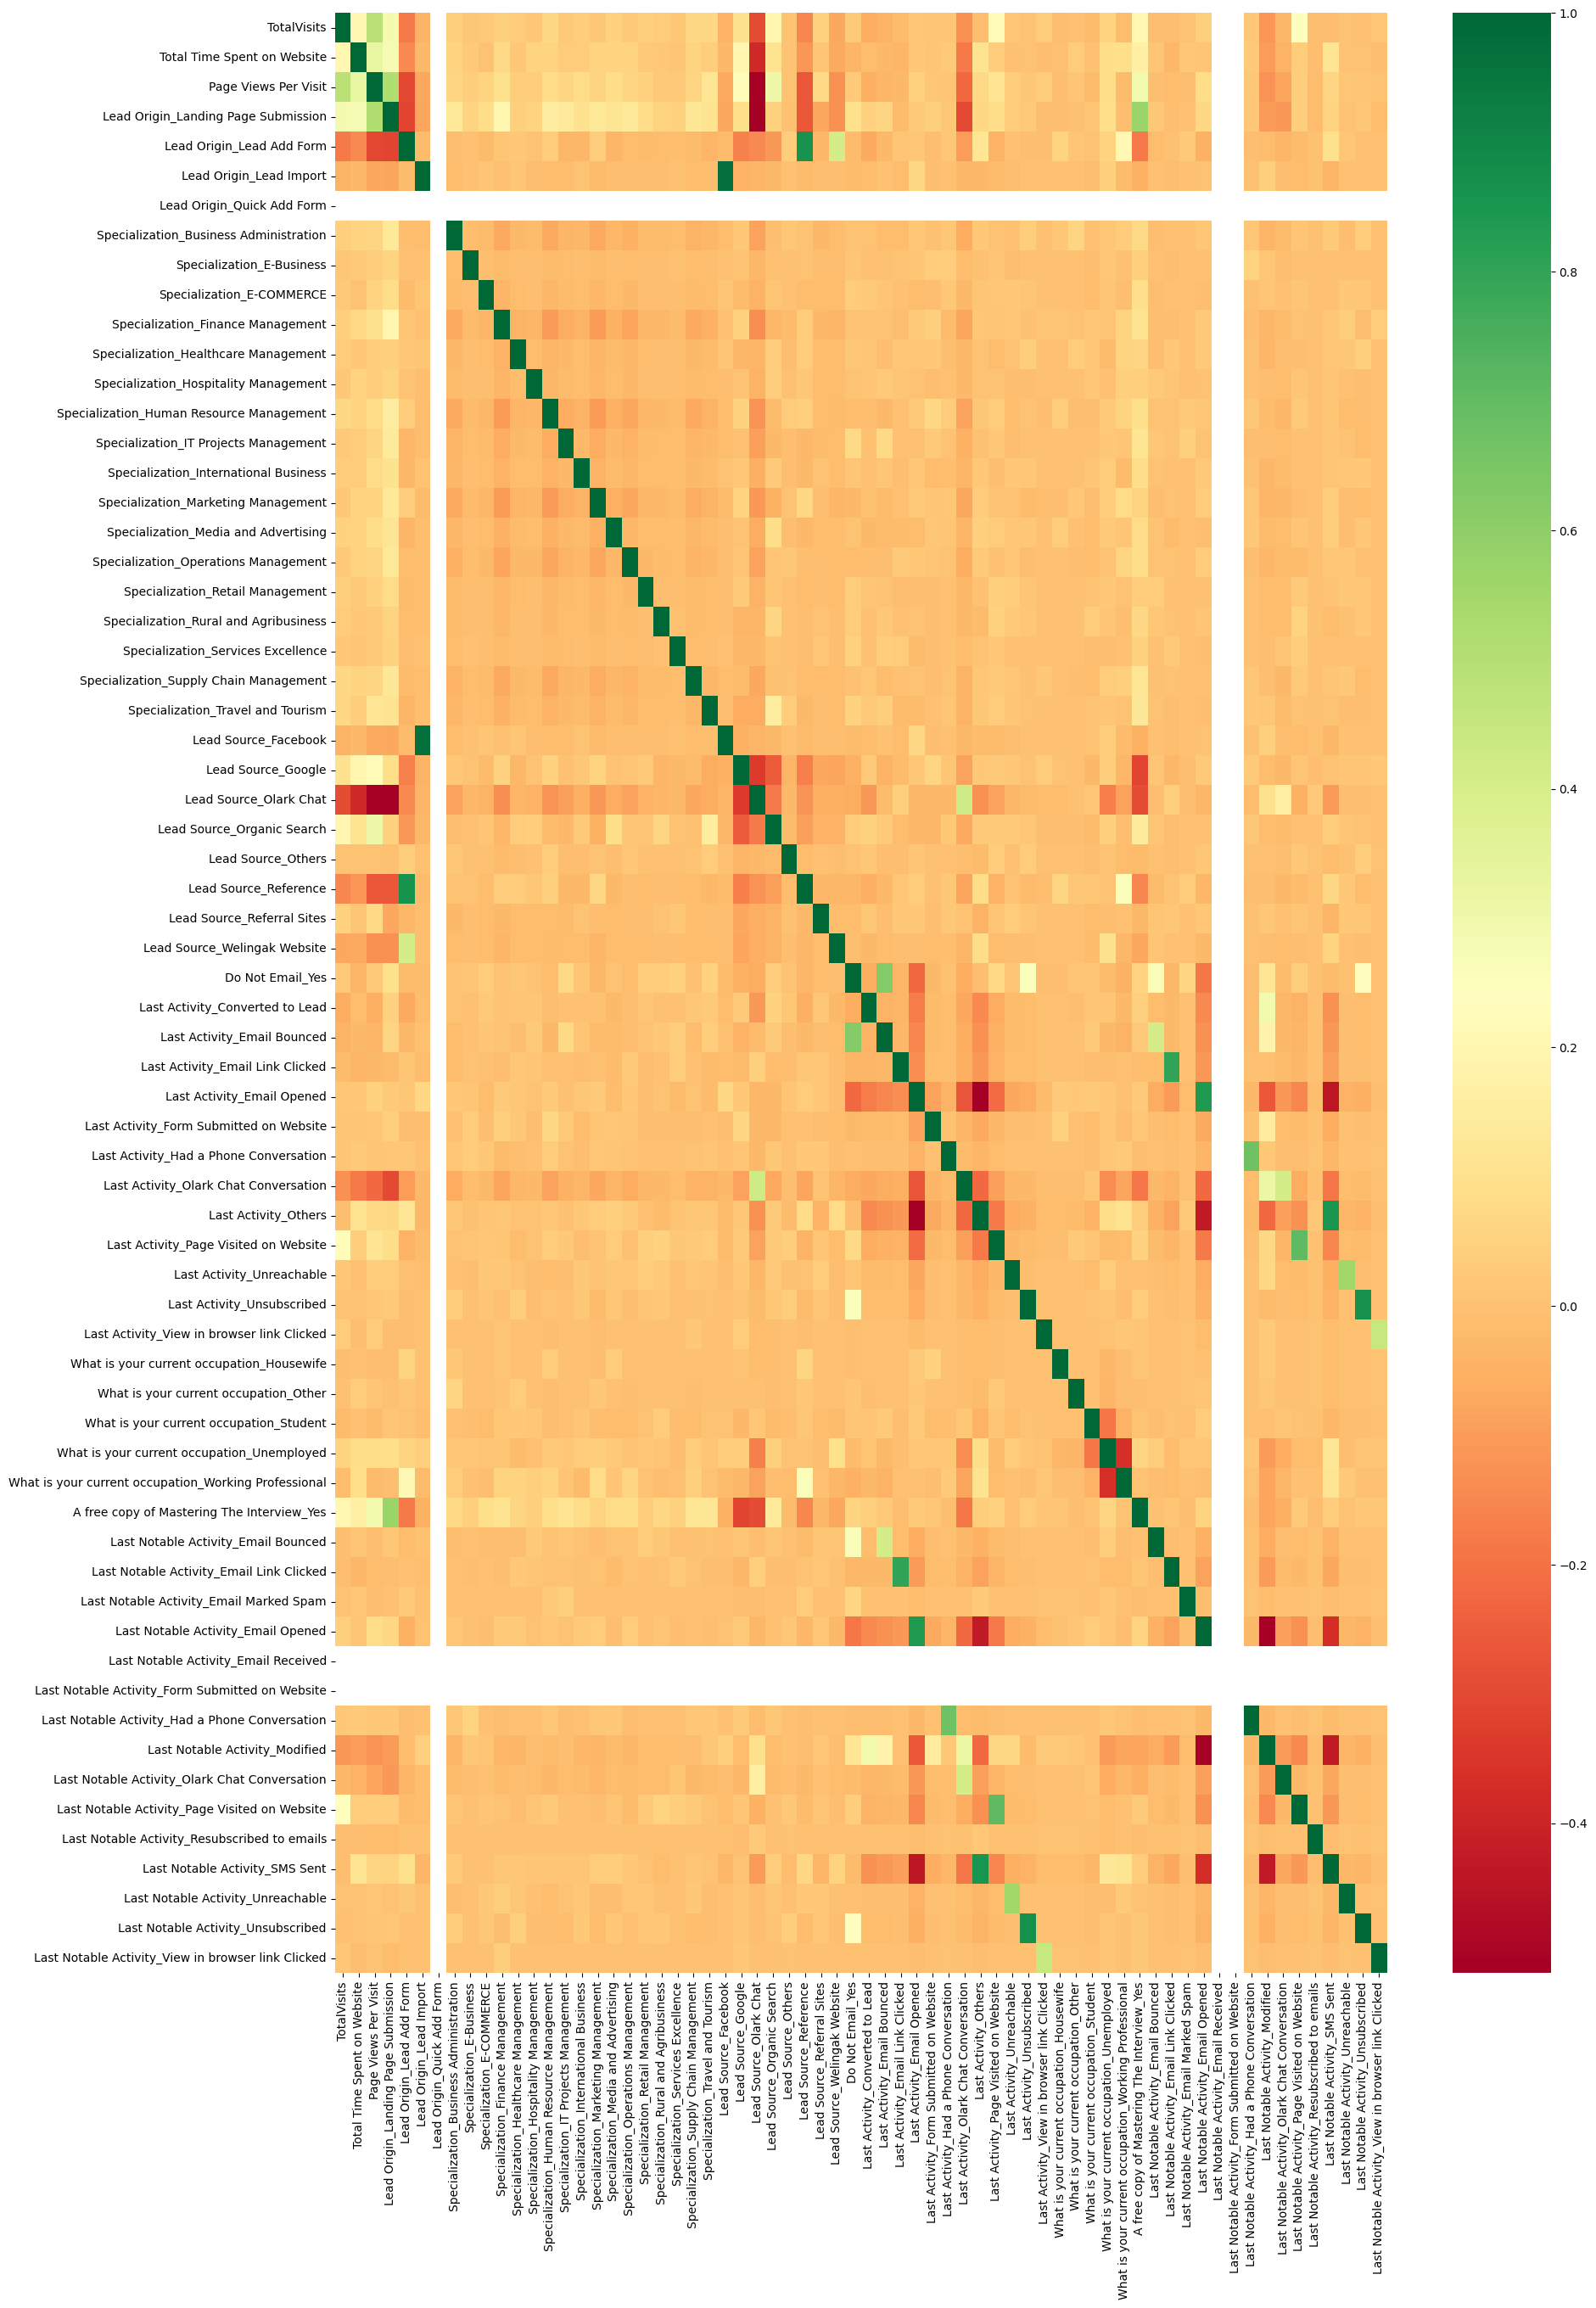

In [91]:
# Check for correlation among variables
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr(),cmap = 'RdYlGn')
plt.show()

In [92]:
#top 10 Correlation for X_train
correlation_0_target = X_train.corr()
correlation_0_target = correlation_0_target.where(np.triu(np.ones(correlation_0_target.shape), k=1).astype(np.bool))
correlation_0_target = correlation_0_target.unstack().reset_index().dropna(subset = [0])
correlation_0_target.columns = ['VAR1', 'VAR2', 'Correlation_Value']
correlation_0_target['Corr_abs'] = abs(correlation_0_target['Correlation_Value'])
correlation_0_target.sort_values(by = "Corr_abs", ascending =False, inplace = True)
correlation_0_target.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
1589,Lead Source_Facebook,Lead Origin_Lead Import,0.972067,0.972067
4267,Last Notable Activity_Unsubscribed,Last Activity_Unsubscribed,0.868863,0.868863
1918,Lead Source_Reference,Lead Origin_Lead Add Form,0.858239,0.858239
4132,Last Notable Activity_SMS Sent,Last Activity_Others,0.854933,0.854933
3600,Last Notable Activity_Email Opened,Last Activity_Email Opened,0.837172,0.837172
3467,Last Notable Activity_Email Link Clicked,Last Activity_Email Link Clicked,0.801010,0.801010
4001,Last Notable Activity_Page Visited on Website,Last Activity_Page Visited on Website,0.704623,0.704623
3800,Last Notable Activity_Had a Phone Conversation,Last Activity_Had a Phone Conversation,0.670249,0.670249
2276,Last Activity_Email Bounced,Do Not Email_Yes,0.621595,0.621595
3303,A free copy of Mastering The Interview_Yes,Lead Origin_Landing Page Submission,0.570659,0.570659


## Model Building

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [94]:
from sklearn.feature_selection import RFE

In [95]:
# Try Run RFE with Variables =15
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [96]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Origin_Quick Add Form', False, 50),
 ('Specialization_Business Administration', False, 25),
 ('Specialization_E-Business', False, 17),
 ('Specialization_E-COMMERCE', False, 24),
 ('Specialization_Finance Management', False, 22),
 ('Specialization_Healthcare Management', False, 12),
 ('Specialization_Hospitality Management', False, 35),
 ('Specialization_Human Resource Management', False, 20),
 ('Specialization_IT Projects Management', False, 21),
 ('Specialization_International Business', False, 29),
 ('Specialization_Marketing Management', False, 18),
 ('Specialization_Media and Advertising', False, 30),
 ('Specialization_Operations Management', False, 23),
 ('Specialization_Retail Management', False, 40),
 ('Specialization_Rural and Agrib

In [97]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [98]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_O

In [99]:
# Select columns selected by RFE
X_train = X_train[col]

In [100]:
import statsmodels.api as sm

In [101]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.5
Date:                Thu, 16 Nov 2023   Deviance:                       5279.1
Time:                        20:04:46   Pearson chi2:                 6.81e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4056
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5639      0.114    -31.324      0.000      -3.787      -3.341
TotalVisits                                              6.6600      2.086      3.193      0.001       2.572      10.748
Total Time Spent on Website                              4.5645      0.166     27.563      0.000       4.240       4.889
Lead Origin_Lead Add Form                                3.6542      0.200     18.295      0.000       3.263       4.046
Lead Source_Olark Chat                                   1.4642      0.111     13.225      0.000       1.247       1.681
Lead Source_Welingak Website                             2.4555      1.029      2.387      0.017       0.439       4.472
Do Not Email_Yes                                        -1.5344      0.167     -9.175      0.000      -1.862      -1.207
Last Activity_Olark Chat Conversation                   -1.1424      0.159     -7.181      0.000      -1.454      -0.831
Last Activity_Others                                     1.3789      0.075     18.455      0.000       1.232       1.525
What is your current occupation_Housewife               22.4833   1.15e+04      0.002      0.998   -2.25e+04    2.25e+04
What is your current occupation_Other                    1.3217      0.811      1.630      0.103      -0.268       2.911
What is your current occupation_Student                  1.4091      0.220      6.397      0.000       0.977       1.841
What is your current occupation_Unemployed               1.2741      0.088     14.523      0.000       1.102       1.446
What is your current occupation_Working Professional     3.7775      0.195     19.351      0.000       3.395       4.160
Last Notable Activity_Had a Phone Conversation           3.2585      1.172      2.781      0.005       0.962       5.555
Last Notable Activity_Unreachable                        2.6639      0.689      3.868      0.000       1.314       4.014
========================================================================================================================
"""

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.20
1,Total Time Spent on Website,1.92
2,Lead Origin_Lead Add Form,1.52
3,Lead Source_Olark Chat,1.50
7,Last Activity_Others,1.49
0,TotalVisits,1.48
6,Last Activity_Olark Chat Conversation,1.38
12,What is your current occupation_Working Profes...,1.33
4,Lead Source_Welingak Website,1.24
5,Do Not Email_Yes,1.06


In [104]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [105]:
# Refit the model with the new set
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2645.1
Date:                Thu, 16 Nov 2023   Deviance:                       5290.3
Time:                        20:04:46   Pearson chi2:                 6.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4045
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5412      0.113    -31.313      0.000      -3.763      -3.320
TotalVisits                                              6.6063      2.082      3.174      0.002       2.527      10.686
Total Time Spent on Website                              4.5617      0.165     27.576      0.000       4.237       4.886
Lead Origin_Lead Add Form                                3.6903      0.200     18.475      0.000       3.299       4.082
Lead Source_Olark Chat                                   1.4574      0.111     13.185      0.000       1.241       1.674
Lead Source_Welingak Website                             2.4191      1.029      2.351      0.019       0.403       4.435
Do Not Email_Yes                                        -1.5394      0.167     -9.200      0.000      -1.867      -1.211
Last Activity_Olark Chat Conversation                   -1.1468      0.159     -7.213      0.000      -1.458      -0.835
Last Activity_Others                                     1.3726      0.075     18.391      0.000       1.226       1.519
What is your current occupation_Other                    1.2998      0.812      1.601      0.109      -0.291       2.891
What is your current occupation_Student                  1.3891      0.220      6.310      0.000       0.958       1.821
What is your current occupation_Unemployed               1.2551      0.087     14.398      0.000       1.084       1.426
What is your current occupation_Working Professional     3.7575      0.195     19.275      0.000       3.375       4.140
Last Notable Activity_Had a Phone Conversation           3.2501      1.170      2.778      0.005       0.957       5.543
Last Notable Activity_Unreachable                        2.6542      0.688      3.856      0.000       1.305       4.003
========================================================================================================================
"""

In [106]:
# Make a VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.20
1,Total Time Spent on Website,1.92
2,Lead Origin_Lead Add Form,1.51
3,Lead Source_Olark Chat,1.50
7,Last Activity_Others,1.49
0,TotalVisits,1.48
6,Last Activity_Olark Chat Conversation,1.38
11,What is your current occupation_Working Profes...,1.33
4,Lead Source_Welingak Website,1.24
5,Do Not Email_Yes,1.06


In [107]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [108]:
# Refit the model with the new set
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.0
Date:                Thu, 16 Nov 2023   Deviance:                       5302.0
Time:                        20:04:47   Pearson chi2:                 6.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5332      0.113    -31.274      0.000      -3.755      -3.312
TotalVisits                                              6.7466      2.089      3.230      0.001       2.653      10.840
Total Time Spent on Website                              4.5561      0.165     27.586      0.000       4.232       4.880
Lead Origin_Lead Add Form                                3.6845      0.200     18.450      0.000       3.293       4.076
Lead Source_Olark Chat                                   1.4520      0.110     13.145      0.000       1.236       1.669
Lead Source_Welingak Website                             2.4193      1.029      2.352      0.019       0.403       4.436
Do Not Email_Yes                                        -1.5438      0.167     -9.232      0.000      -1.872      -1.216
Last Activity_Olark Chat Conversation                   -1.1520      0.159     -7.248      0.000      -1.464      -0.840
Last Activity_Others                                     1.3642      0.075     18.304      0.000       1.218       1.510
What is your current occupation_Other                    1.2945      0.812      1.595      0.111      -0.297       2.886
What is your current occupation_Student                  1.3845      0.220      6.292      0.000       0.953       1.816
What is your current occupation_Unemployed               1.2567      0.087     14.427      0.000       1.086       1.427
What is your current occupation_Working Professional     3.7528      0.195     19.261      0.000       3.371       4.135
Last Notable Activity_Unreachable                        2.6450      0.688      3.843      0.000       1.296       3.994
========================================================================================================================
"""

In [109]:
# Make a VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.20
1,Total Time Spent on Website,1.92
2,Lead Origin_Lead Add Form,1.51
3,Lead Source_Olark Chat,1.50
7,Last Activity_Others,1.49
0,TotalVisits,1.48
6,Last Activity_Olark Chat Conversation,1.38
11,What is your current occupation_Working Profes...,1.33
4,Lead Source_Welingak Website,1.24
5,Do Not Email_Yes,1.06


In [110]:
X_train.drop('What is your current occupation_Other', axis = 1, inplace = True)

In [111]:
# Refit the model with the new set
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.3
Date:                Thu, 16 Nov 2023   Deviance:                       5304.5
Time:                        20:04:47   Pearson chi2:                 6.85e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4032
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5223      0.113    -31.298      0.000      -3.743      -3.302
TotalVisits                                              6.7155      2.087      3.218      0.001       2.625      10.806
Total Time Spent on Website                              4.5640      0.165     27.641      0.000       4.240       4.888
Lead Origin_Lead Add Form                                3.6930      0.200     18.490      0.000       3.302       4.084
Lead Source_Olark Chat                                   1.4518      0.110     13.149      0.000       1.235       1.668
Lead Source_Welingak Website                             2.4117      1.029      2.344      0.019       0.395       4.428
Do Not Email_Yes                                        -1.5390      0.167     -9.208      0.000      -1.867      -1.211
Last Activity_Olark Chat Conversation                   -1.1561      0.159     -7.276      0.000      -1.468      -0.845
Last Activity_Others                                     1.3601      0.074     18.266      0.000       1.214       1.506
What is your current occupation_Student                  1.3727      0.220      6.242      0.000       0.942       1.804
What is your current occupation_Unemployed               1.2454      0.087     14.371      0.000       1.076       1.415
What is your current occupation_Working Professional     3.7412      0.195     19.222      0.000       3.360       4.123
Last Notable Activity_Unreachable                        2.6400      0.688      3.838      0.000       1.292       3.988
========================================================================================================================
"""

In [112]:
# Make a VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.19
1,Total Time Spent on Website,1.91
2,Lead Origin_Lead Add Form,1.51
3,Lead Source_Olark Chat,1.50
7,Last Activity_Others,1.49
0,TotalVisits,1.48
6,Last Activity_Olark Chat Conversation,1.38
10,What is your current occupation_Working Profes...,1.33
4,Lead Source_Welingak Website,1.24
5,Do Not Email_Yes,1.06


## Creating Prediction

In [113]:
# Predict the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3112    0.199607
8413    0.910394
2961    0.984507
24      0.546596
2740    0.458896
489     0.121186
9116    0.630657
4176    0.234382
8537    0.667987
6267    0.134007
dtype: float64

In [114]:
# Reshape to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19960685, 0.91039372, 0.98450661, 0.54659577, 0.45889588,
       0.12118635, 0.63065732, 0.23438156, 0.66798663, 0.13400685])

In [115]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.199607
1,1,0.910394
2,1,0.984507
3,1,0.546596
4,0,0.458896


In [116]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.199607,0
1,1,0.910394,1
2,1,0.984507,1
3,1,0.546596,1
4,0,0.458896,0


## Model Evaluation

In [117]:
from sklearn import metrics

In [118]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3498,  456],
       [ 745, 1769]], dtype=int64)

In [119]:
# Checking for the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8143166357452072

In [120]:
#  value of true positive - TP
TP = confusion[1,1]
# value of true negatives - TN
TN = confusion[0,0]
#  value of false positives - FP
FP = confusion[0,1] 
# value of false negatives - FN
FN = confusion[1,0]

In [121]:
# Calculating the sensitivity
TP/(TP+FN)

0.7036595067621321

In [122]:
# Calculating the specificity
TN/(TN+FP)

0.8846737481031867

## PLOTTING ROC CURVE

In [123]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [124]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'], drop_intermediate = False )

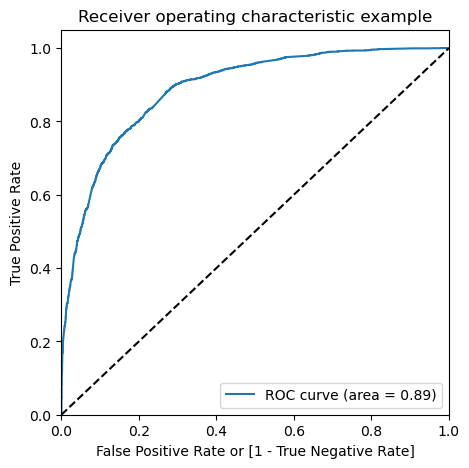

In [125]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'])

The ROC Curve should be a value close to 1. We are getting a good value of 0.89 indicating a good predictive model.

## Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [126]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.199607,0,1,1,0,0,0,0,0,0,0,0
1,1,0.910394,1,1,1,1,1,1,1,1,1,1,1
2,1,0.984507,1,1,1,1,1,1,1,1,1,1,1
3,1,0.546596,1,1,1,1,1,1,1,0,0,0,0
4,0,0.458896,0,1,1,1,1,1,0,0,0,0,0


In [127]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.388683  1.000000  0.000000
0.1   0.1  0.583797  0.987271  0.327264
0.2   0.2  0.763142  0.913683  0.667425
0.3   0.3  0.787724  0.875497  0.731917
0.4   0.4  0.809988  0.771679  0.834345
0.5   0.5  0.814317  0.703660  0.884674
0.6   0.6  0.805349  0.632856  0.915023
0.7   0.7  0.780303  0.519889  0.945878
0.8   0.8  0.758813  0.430788  0.967375
0.9   0.9  0.714595  0.284407  0.988113


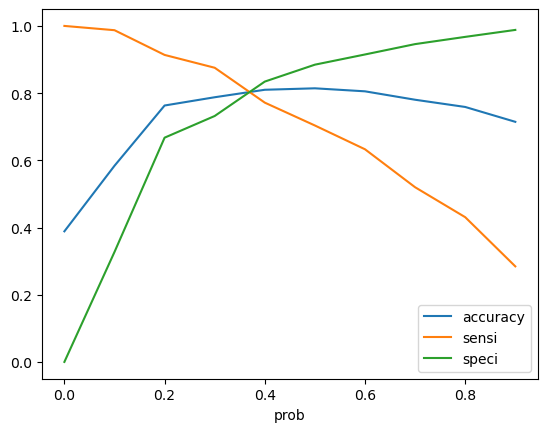

In [128]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [129]:
# From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.199607,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.910394,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.984507,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.546596,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.458896,0,1,1,1,1,1,0,0,0,0,0,1


In [130]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Conversion_Prob','final_Predicted','Lead_Score']].head()

,Converted,Conversion_Prob,final_Predicted,Lead_Score
0,0,0.199607,0,20
1,1,0.910394,1,91
2,1,0.984507,1,98
3,1,0.546596,1,55
4,0,0.458896,1,46


In [131]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8099876314162029

In [132]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3299,  655],
       [ 574, 1940]], dtype=int64)

In [133]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.771678599840891

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.8343449671219019

###### Observation of Train Set
- Cutoff = 0.4
- Accuracy = 81%
- Sensitivity = 77.17%
- Specificity = 83.43%

## Prediction on Test set

In [136]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [137]:
# Substituting all the columns in the final train model
col = X_train.columns

In [138]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm.shape

(2772, 13)

In [139]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.182828
1,0,0.715161
2,0,0.628547
3,0,0.146255
4,0,0.309750


In [140]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.182828,0
1,0,0.715161,1
2,0,0.628547,1
3,0,0.146255,0
4,0,0.309750,0


In [141]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8077200577200577

In [142]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1399,  326],
       [ 207,  840]], dtype=int64)

In [143]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [144]:
# Calculating the sensitivity
TP/(TP+FN)

0.8022922636103151

In [145]:
# Calculating the specificity
TN/(TN+FP)

0.8110144927536231

## Precision-Recall

In [146]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3498,  456],
       [ 745, 1769]], dtype=int64)

In [147]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7950561797752809

In [148]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7036595067621321

## Precision and Recall tradeoff

In [149]:
from sklearn.metrics import precision_recall_curve

In [150]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       1
 4       0
 5       1
 6       1
 7       0
 8       0
 9       0
 10      0
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      1
 21      1
 22      0
 23      0
 24      1
 25      0
 26      1
 27      0
 28      0
 29      0
 30      0
 31      1
 32      0
 33      1
 34      0
 35      0
 36      1
 37      1
 38      0
 39      1
 40      0
 41      0
 42      1
 43      0
 44      1
 45      0
 46      1
 47      1
 48      0
 49      0
 50      0
 51      1
 52      1
 53      1
 54      0
 55      0
 56      0
 57      1
 58      0
 59      1
 60      0
 61      0
 62      0
 63      0
 64      1
 65      1
 66      0
 67      0
 68      0
 69      0
 70      1
 71      0
 72      0
 73      0
 74      1
 75      0
 76      0
 77      0
 78      1
 79      0
 80      0
 81      0
 82      0
 83      0
 84      0
 85      0
 86      1
 87      0
 88      0
 89      1
 90      1

In [151]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

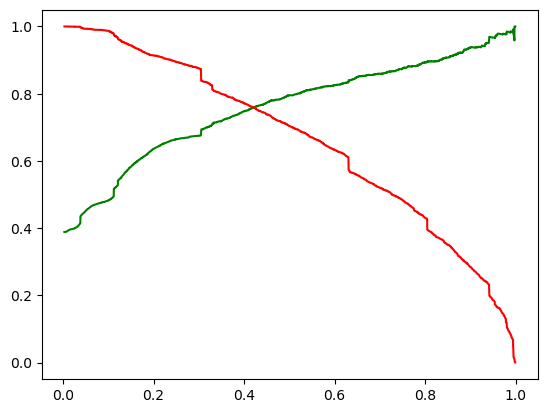

In [152]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [153]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score,final_predicted
0,0,0.199607,0,1,1,0,0,0,0,0,0,0,0,0,20,0
1,1,0.910394,1,1,1,1,1,1,1,1,1,1,1,1,91,1
2,1,0.984507,1,1,1,1,1,1,1,1,1,1,1,1,98,1
3,1,0.546596,1,1,1,1,1,1,1,0,0,0,0,1,55,1
4,0,0.458896,0,1,1,1,1,1,0,0,0,0,0,1,46,1


In [154]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8104514533085961

In [155]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3317,  637],
       [ 589, 1925]], dtype=int64)

In [156]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [157]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7513661202185792

In [158]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7657120127287191

## Prediction on Test Set Again

In [159]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.182828
1,0,0.715161
2,0,0.628547
3,0,0.146255
4,0,0.309750


In [160]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.182828,0
1,0,0.715161,1
2,0,0.628547,1
3,0,0.146255,0
4,0,0.309750,0


In [161]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8106060606060606

In [162]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1448,  277],
       [ 248,  799]], dtype=int64)

In [163]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [164]:
# Calculating the sensitivity
TP/(TP+FN)

0.7631327602674307

In [165]:
# Calculating the specificity
TN/(TN+FP)

0.8394202898550724

In [166]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7425650557620818

In [167]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7631327602674307

#### After running the model on the Test Data these are the figures we obtain:
- Accuracy = 81.06%
- Sensitivity = 76.31%
- Specificity = 83.94%

## Final Observation

#### Train Set:
- Accuracy = 81.06%
- Sensitivity = 77.17%
- Specificity = 83.43%

#### Test Set:
- Accuracy = 81.02%
- Sensitivity = 76.31%
- Specificity = 83.94%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model.